In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import math

In [2]:
#Import Dataset
data= pd.read_csv("college.csv")
data

,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


## Understanding Business Question

#### Description: Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.


#### Format: A data frame with 777 observations on the following 18 variables.

### Variables
Private: A factor with levels No and Yes indicating private or public university

Apps: Number of applications received

Accept: Number of applications accepted

Enroll: Number of new students enrolled

Top10perc: Pct. new students from top 10% of H.S. class

Top25perc: Pct. new students from top 25% of H.S. class

F.Undergrad: Number of fulltime undergraduates

P.Undergrad: Number of parttime undergraduates

Outstate: Out-of-state tuition

Room.Board: Room and board costs

Books: Estimated book costs

Personal: Estimated personal spending

PhD: Pct. of faculty with Ph.D.'s

Terminal: Pct. of faculty with terminal degree

S.F.Ratio: Student/faculty ratio

perc.alumni: Pct. alumni who donate

Expend: Instructional expenditure per student

Grad.Rate: Graduation rate


## Data Inspection

In [3]:
data.isna().sum()

College.Name    0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD             0
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

There is no missing value in Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   College.Name  777 non-null    object 
 1   Private       777 non-null    object 
 2   Apps          777 non-null    int64  
 3   Accept        777 non-null    int64  
 4   Enroll        777 non-null    int64  
 5   Top10perc     777 non-null    int64  
 6   Top25perc     777 non-null    int64  
 7   F.Undergrad   777 non-null    int64  
 8   P.Undergrad   777 non-null    int64  
 9   Outstate      777 non-null    int64  
 10  Room.Board    777 non-null    int64  
 11  Books         777 non-null    int64  
 12  Personal      777 non-null    int64  
 13  PhD           777 non-null    int64  
 14  Terminal      777 non-null    int64  
 15  S.F.Ratio     777 non-null    float64
 16  perc.alumni   777 non-null    int64  
 17  Expend        777 non-null    int64  
 18  Grad.Rate     777 non-null    

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


### Note:
The variable 'PhD' represents a percentage, and according to the summary of the data, the maximum value for PhD is 103. This value is likely incorrect. Similarly, for Grad.Rate, the maximum value is listed as 118, which is also likely incorrect. To rectify these discrepancies, I have modified any values exceeding 100 for both PhD and Grad.Rate variables to be capped at 100.

In [6]:
#There is one record (582) where the value for the variable 'PhD' exceeds 100. 
#I have corrected this by modifying it to 100.

data.loc[data['PhD']>100,'PhD']=100

In [7]:
#There is one record (95) where the value for the variable 'Grad.Rate' exceeds 100. 
#I have corrected this by modifying it to 100.

data.loc[data['Grad.Rate']>100,'Grad.Rate']=100

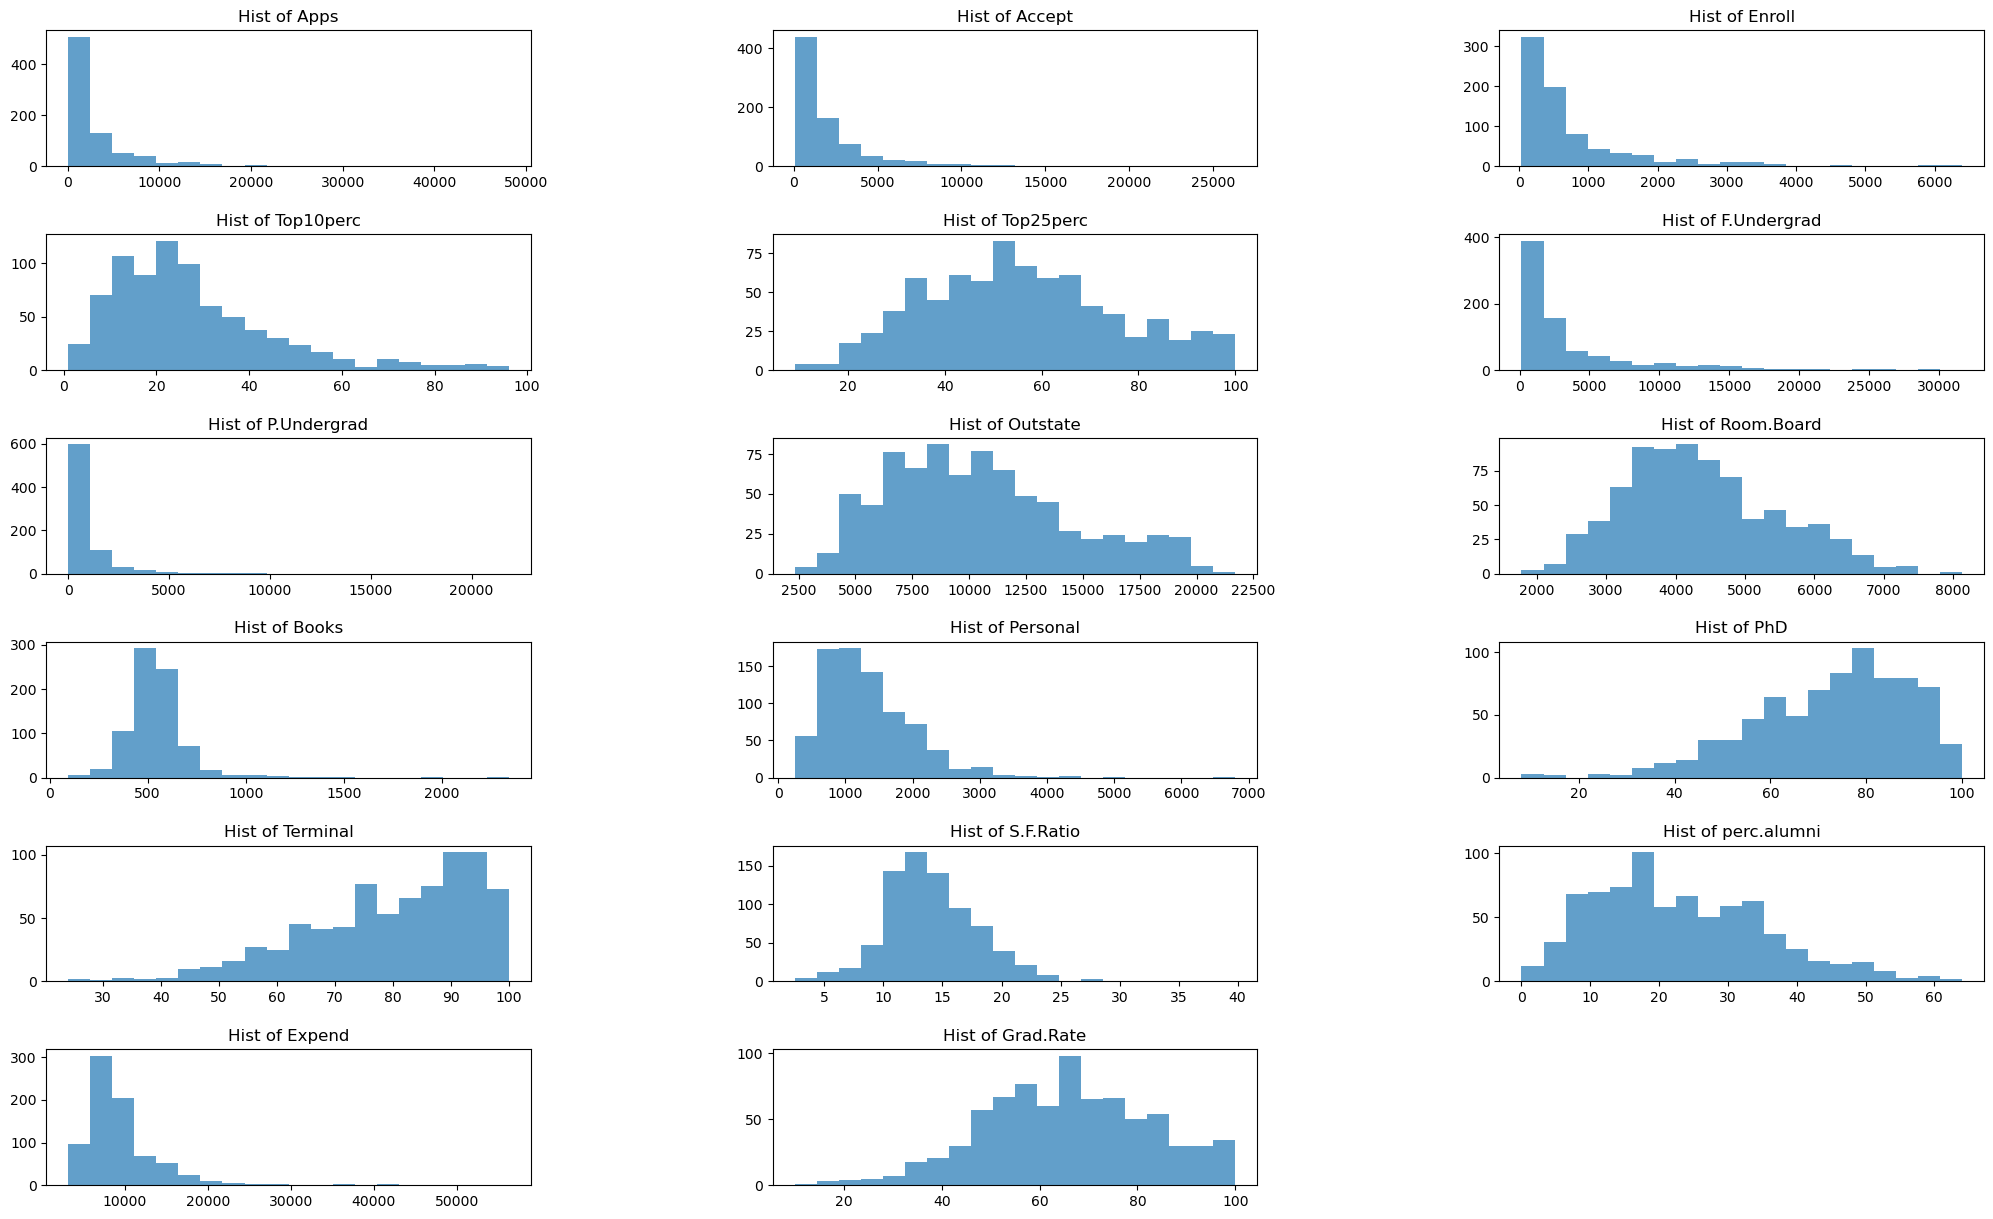

In [8]:
#Continuous variables distribution

val_ind=list(range(2,19))
plot=plt.figure(figsize=(25,15))
plot.subplots_adjust(hspace=0.5,wspace=0.5)
for i in range(1,18):
    histplot=plot.add_subplot(6,3,i)
    histplot.hist(data.iloc[:,val_ind[i-1]],alpha=0.7,bins=20)
    histplot.title.set_text("Hist of "+ data.columns[val_ind[i-1]])

#### Assumptions:
According to Histograms, the presence of highly skewed feature variables and a skewed response variable can introduce challenges related to heteroscedasticity.

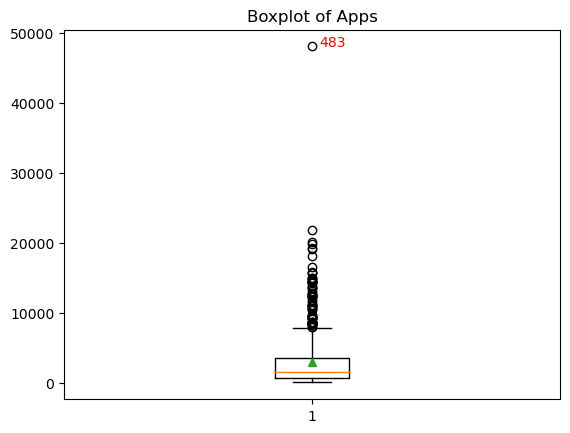

In [9]:
#box_plot Apps
box= plt.boxplot(data['Apps'],showmeans=True)
outlier=data['Apps'].argmax()
plt.annotate(outlier, xy=(1, data['Apps'].max()), xytext=(5, 0), textcoords='offset points', color='red')
plt.title('Boxplot of Apps')
plt.show()

The box plot of Apps reveals the presence of outliers, with only one observation displaying a significant deviation from the others.

In [10]:
#Correlation Analysis
corr_table= round( data.iloc[:,2:].corr(method='pearson'),3)
corr_table

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000,0.943,0.847,0.339,0.352,0.814,0.398,0.050,0.165,0.133,0.179,0.391,0.369,0.096,-0.090,0.260,0.147
Accept,0.943,1.000,0.912,0.192,0.247,0.874,0.441,-0.026,0.091,0.114,0.201,0.356,0.338,0.176,-0.160,0.125,0.067
Enroll,0.847,0.912,1.000,0.181,0.227,0.965,0.513,-0.155,-0.040,0.113,0.281,0.332,0.308,0.237,-0.181,0.064,-0.022
Top10perc,0.339,0.192,0.181,1.000,0.892,0.141,-0.105,0.562,0.371,0.119,-0.093,0.532,0.491,-0.385,0.455,0.661,0.498
Top25perc,0.352,0.247,0.227,0.892,1.000,0.199,-0.054,0.489,0.331,0.116,-0.081,0.546,0.525,-0.295,0.418,0.527,0.480
F.Undergrad,0.814,0.874,0.965,0.141,0.199,1.000,0.571,-0.216,-0.069,0.116,0.317,0.319,0.300,0.280,-0.229,0.019,-0.078
P.Undergrad,0.398,0.441,0.513,-0.105,-0.054,0.571,1.000,-0.254,-0.061,0.081,0.320,0.149,0.142,0.233,-0.281,-0.084,-0.257
Outstate,0.050,-0.026,-0.155,0.562,0.489,-0.216,-0.254,1.000,0.654,0.039,-0.299,0.383,0.408,-0.555,0.566,0.673,0.574
Room.Board,0.165,0.091,-0.040,0.371,0.331,-0.069,-0.061,0.654,1.000,0.128,-0.199,0.330,0.375,-0.363,0.272,0.502,0.426
Books,0.133,0.114,0.113,0.119,0.116,0.116,0.081,0.039,0.128,1.000,0.179,0.027,0.100,-0.032,-0.040,0.112,0.001


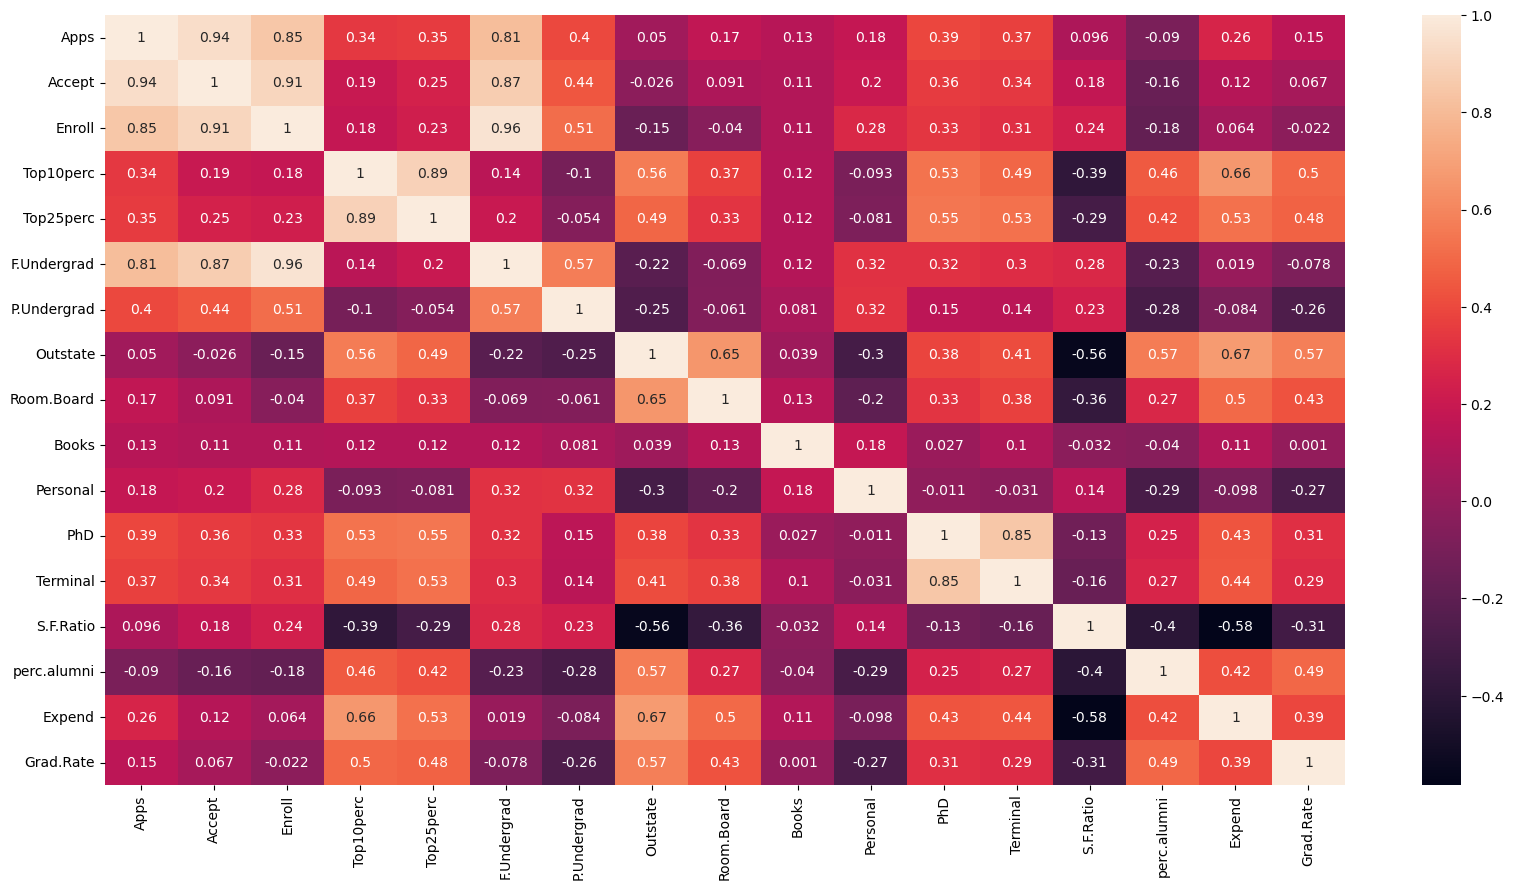

In [11]:
#Correlation Heatmap
plot=plt.figure(figsize=(20,10))
sns.heatmap(corr_table, annot=True)
plt.show()

### Note:
Based on the correlation table, a clear linear relationship is evident among the four variables: Apps, Acceptances, Enrollments, and Full-time Undergraduates. Furthermore, a positive linear relationship can be observed between Outstate and Room.Board. Additionally, a positive relationship is observed between Outstate and Expend, as well as between Room.Board and Expend. Moreover, a strong positive linear relationship is evident between the variables PhD and Terminal. 
###### It is important to note that these relationships may lead to the issue of multicollinearity.

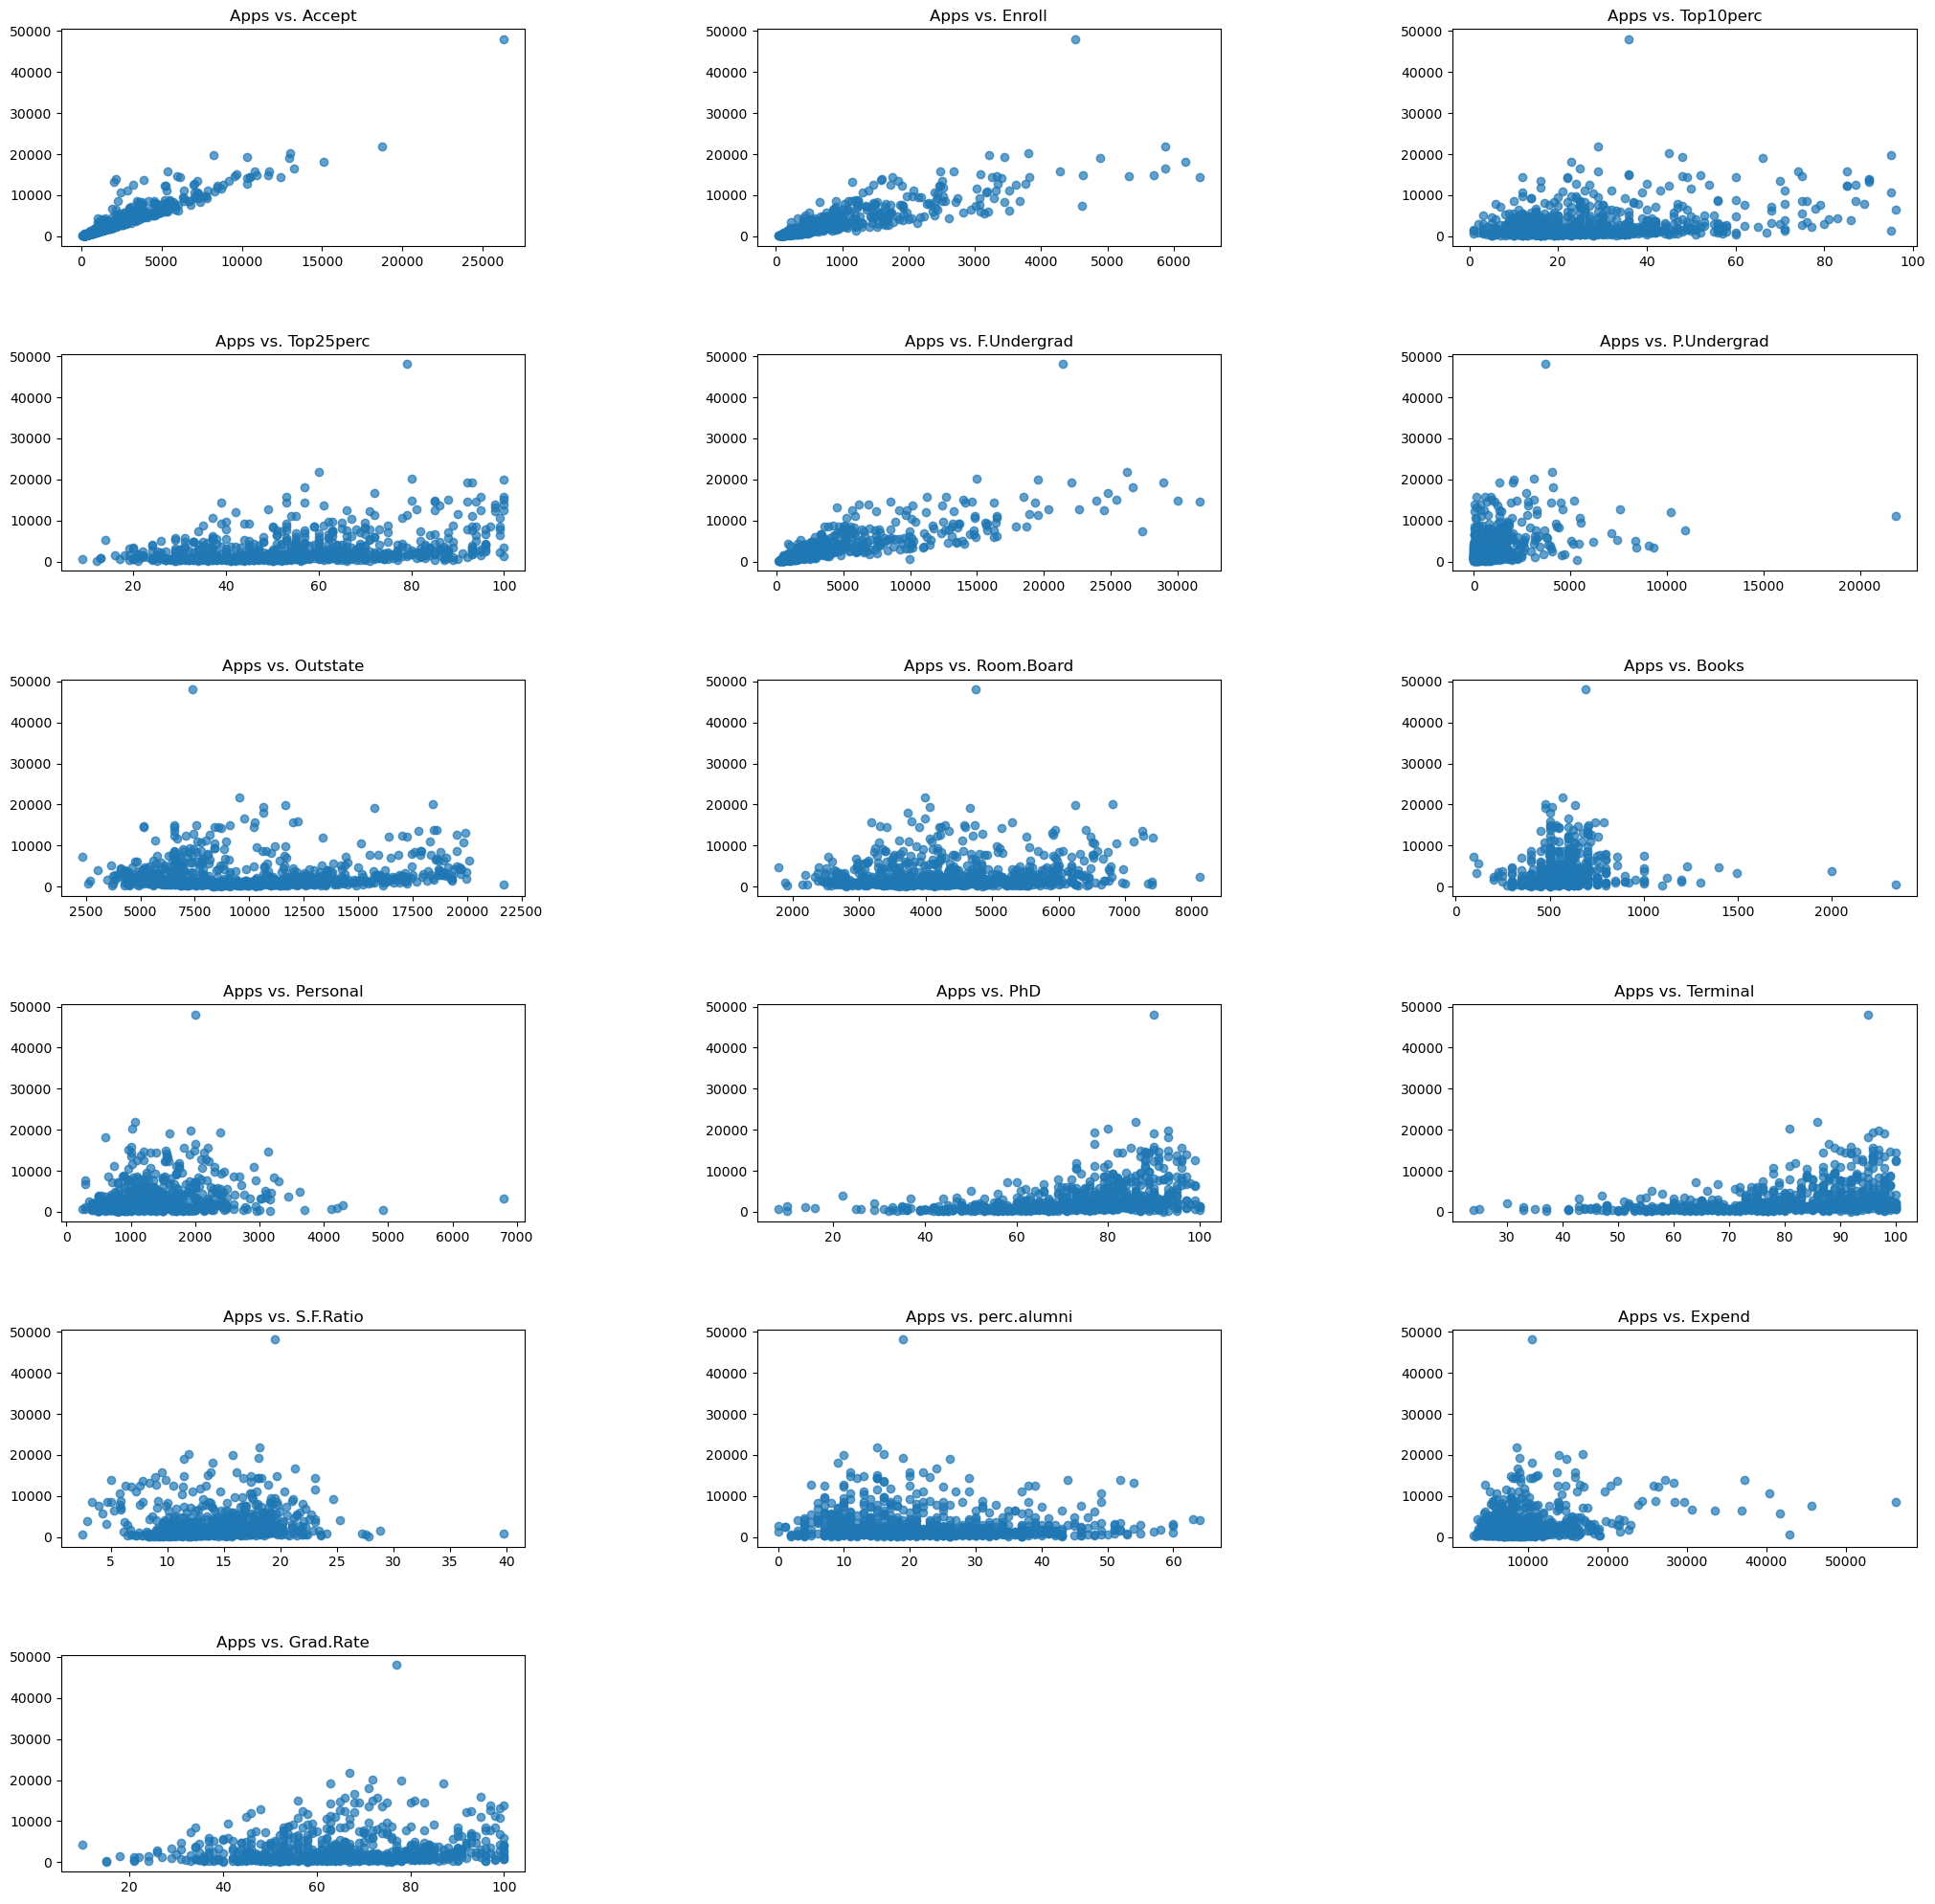

In [12]:
#scatter plot continuous variables
val_ind=list(range(3,19))

plot=plt.figure(figsize=(25,25))
plot.subplots_adjust(hspace=0.5,wspace=0.5)
for j in range(1,17):
    scatter_plot=plot.add_subplot(6,3,j)
    scatter_plot.scatter(data.iloc[:,val_ind[j-1]],data.iloc[:,2],alpha=0.7)
    scatter_plot.title.set_text('Apps vs. '+ data.columns[val_ind[j-1]])
plt.show()

Note:
There exists a discernible positive relationship between the variables of Applications and Acceptances, Applications and Enrollments, as well as Applications and Full-time Undergraduates.

In [13]:
#categorical variable
data['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

#### Note:
The number of private colleges is three times higher than the number of non-private colleges, which is an important factor to consider when splitting the data for training and testing purposes.

<Axes: xlabel='Private', ylabel='Apps'>

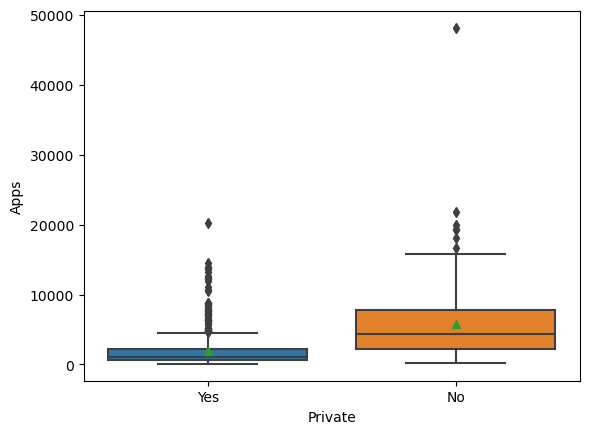

In [14]:
#box-plot for two groups Private
sns.boxplot(x=data['Private'],y=data['Apps'],showmeans = True)

#### Note: 
There is a significant difference between the two groups being compared

In [15]:
#check the differnce between Private and None-Private colleges with statistical Analysis
import numpy as np
from scipy import stats
Apps_Private =data[data['Private']=='Yes']['Apps']
Apps_NPrivate=data[data['Private']=='No']['Apps']
u_statistic, p_value = stats.mannwhitneyu(Apps_Private,Apps_NPrivate)
print("U-Statistic: ", u_statistic)
print("P-Value: ", p_value)

U-Statistic:  23259.5
P-Value:  1.8288548129023136e-39


#### Result:
The p-value suggests that there is a significant difference between the two groups being compared.

## Data Prepration

In [16]:
#drop college name from data
df= data.drop(['College.Name'],axis=1).copy()
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [17]:
# encode the "Private" variable using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
X = df.drop('Private', axis=1) 
encoder = OneHotEncoder(sparse=False)
encoded_private = encoder.fit_transform(df[['Private']]) 
encoded_df = pd.DataFrame(encoded_private, columns=['Private_No','Private_Yes'])
encoded_df = pd.concat([encoded_df, X], axis=1)
encoded_df= encoded_df.drop(['Private_No'],axis=1)
encoded_df

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Private_Yes,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1.0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1.0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1.0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1.0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1.0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1.0,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1.0,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1.0,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


### Divide Dataset into Train and Test

In [18]:
from sklearn.model_selection import train_test_split
X= encoded_df.drop(['Apps'],axis=1) # Features matrix
y=encoded_df['Apps'] # Response
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3,random_state=248) #Split to train and test

In [19]:
X_train['Private_Yes'].value_counts()

1.0    402
0.0    141
Name: Private_Yes, dtype: int64

In [20]:
X_test['Private_Yes'].value_counts()

1.0    163
0.0     71
Name: Private_Yes, dtype: int64

In [21]:
X_train.shape

(543, 17)

In [22]:
X_test.shape

(234, 17)

In [23]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Private_Yes,543.0,0.740331,0.438857,0.0,0.00,1.0,1.0,1.0
Accept,543.0,2029.235727,2481.206184,72.0,624.00,1221.0,2432.0,26330.0
Enroll,543.0,770.550645,915.594512,35.0,249.50,443.0,903.5,6392.0
Top10perc,543.0,28.298343,18.121142,1.0,15.50,24.0,36.0,96.0
Top25perc,543.0,56.839779,19.836837,9.0,42.00,55.0,70.0,100.0
F.Undergrad,543.0,3606.390424,4681.283860,139.0,1000.00,1720.0,4055.5,31643.0
P.Undergrad,543.0,810.208103,1305.239448,1.0,83.00,353.0,911.0,10221.0
Outstate,543.0,10619.909761,4092.918591,2580.0,7392.00,10200.0,13233.0,21700.0
Room.Board,543.0,4400.596685,1106.608541,1780.0,3601.50,4210.0,5070.0,8124.0
Books,543.0,557.738490,173.372255,110.0,487.00,530.0,600.0,2340.0


In [24]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Private_Yes,234.0,0.696581,0.460720,0.0,0.00,1.0,1.000,1.0
Accept,234.0,1994.598291,2384.877548,165.0,538.75,1032.0,2373.750,18744.0
Enroll,234.0,801.837607,961.597347,63.0,224.25,422.0,863.250,5874.0
Top10perc,234.0,25.841880,16.379505,1.0,15.00,21.5,32.750,95.0
Top25perc,234.0,53.376068,19.558530,13.0,37.25,51.5,65.000,100.0
F.Undergrad,234.0,3916.914530,5225.902132,309.0,955.00,1691.5,3861.750,28938.0
P.Undergrad,234.0,959.931624,1934.071900,4.0,112.25,353.0,1135.750,21836.0
Outstate,234.0,10024.739316,3832.208403,2340.0,7008.75,9770.0,12221.000,19629.0
Room.Board,234.0,4257.581197,1068.993685,1920.0,3436.25,4105.0,4953.500,7398.0
Books,234.0,529.987179,142.573631,96.0,450.00,500.0,600.000,1495.0


### First Model of Linear Regression


In [25]:
#train Linear Regression
X_train_constat=sm.add_constant(X_train) #add constant column to X_train
lm=sm.OLS(y_train,X_train_constat).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     396.1
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.41e-286
Time:                        08:35:00   Log-Likelihood:                -4561.0
No. Observations:                 543   AIC:                             9158.
Df Residuals:                     525   BIC:                             9235.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -489.1032    516.951     -0.946      0.345   -1504.650     526.444
Private_Yes  -456.3996    179.817     -2.538      0.011    -809.649    -103.150
Accept          1.6591      0.049     33.683      0.000       1.562       1.756
Enroll         -0.8204      0.246     -3.342      0.001      -1.303      -0.338
Top10perc      58.9380      6.707      8.787      0.000      45.762      72.114
Top25perc     -16.9170      5.477     -3.088      0.002     -27.677      -6.157
F.Undergrad     0.0075      0.047      0.162      0.872      -0.084       0.099
P.Undergrad     0.0778      0.051      1.523      0.128      -0.023       0.178
Outstate       -0.0911      0.023     -3.924      0.000      -0.137      -0.045
Room.Board      0.1763      0.060      2.916      0.004       0.058       0.295
Books           0.1099      0.289      0.381      0.703      -0.457       0.677
Personal        0.0850      0.079      1.071      0.285      -0.071       0.241
PhD            -6.7643      5.522     -1.225      0.221     -17.612       4.083
Terminal       -8.5075      6.480     -1.313      0.190     -21.238       4.223
S.F.Ratio      22.0272     16.789      1.312      0.190     -10.955      55.009
perc.alumni     0.7174      5.351      0.134      0.893      -9.795      11.230
Expend          0.0728      0.014      5.179      0.000       0.045       0.100
Grad.Rate       7.7081      3.688      2.090      0.037       0.464      14.953
==============================================================================
Omnibus:                      287.096   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3581.379
Skew:                           2.023   Prob(JB):                         0.00
Kurtosis:                      14.913   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### conclusion:
[1] R-squared:  the R-squared value is 0.928, which means that approximately 92.8% of the variability in the dependent variable "Apps" is explained by the independent variables included in the regression model.

[2] Adj.R-squared: The adjusted R-squared value is a modified version of R-squared that adjusts for the number of predictors in the model. It penalizes the addition of unnecessary variables and provides a more reliable measure of model fit. In this case, the adjusted R-squared value is 0.925.

[3] Prob(F-statistic): This represents the p-value associated with the F-statistic. A small p-value ( 2.41e-286) indicates strong evidence against the null hypothesis.

   H0: The null hypothesis associated with the F-statistic in regression analysis is typically that all the coefficients in the regression model are equal to zero. This implies that the independent variables have no effect on the dependent variable.
    
   Here p-value is less than 0.05 then we reject H0
    
[4] Prob(Omnibus): The p-value associated with the Omnibus test. A small p-value ( 0.000) suggests strong evidence against the null hypothesis of normality, indicating that the residuals are not normally distributed.

[5]  Prob(JB): A small p-value (0.00) suggests strong evidence against the null hypothesis of normality, indicating that the residuals are not normally distributed.

### Check Assumptions of Regression

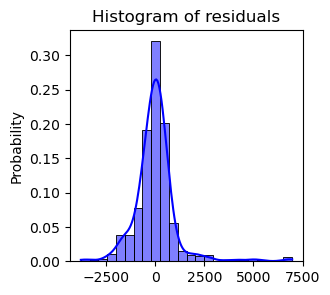

In [26]:
#Normality of residuals
#Plot histogram of residuals
plt.figure(figsize=(3,3))
sns.histplot(lm.resid,stat='probability',
            kde=True,alpha=0.5,color='blue',
            bins=np.linspace(min(lm.resid),max(lm.resid),25))
plt.title("Histogram of residuals")
plt.show()

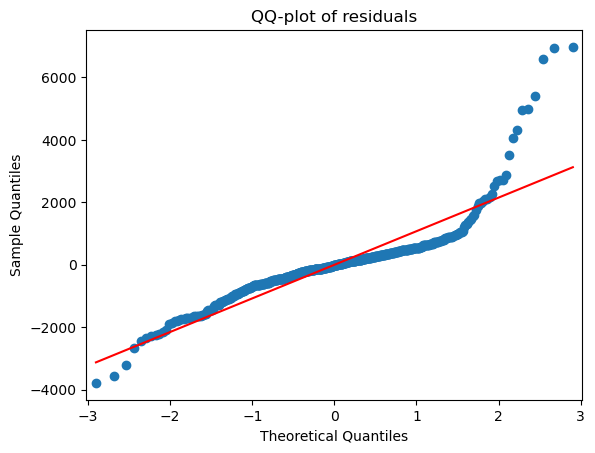

In [27]:
##QQ-plot of residuals
qqplot_lm=sm.qqplot(lm.resid,line='s')
plt.title("QQ-plot of residuals")
plt.show()

#### Note: The residuals do not follow a normal distribution.

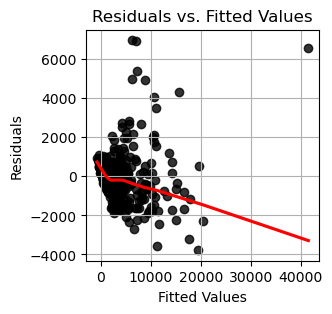

In [28]:
#Residuals vs. Fitted Values
plt.figure(figsize = (3, 3))
sns.regplot(x=lm.fittedvalues,y=lm.resid,lowess=True,
           scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid()
plt.show()

#### Note: 
Observing a cone-shaped or funnel-shaped pattern of residuals in the graph indicates the presence of heteroscedasticity, which violates the assumption of constant variance. To address this issue, applying transformations to the response variables and features might help mitigate the problem. By transforming the data, we can potentially achieve a more uniform spread of residuals across the range of fitted values, improving the model's performance and the validity of the statistical inferences.

In [29]:
#Check Cook's distance
sum(lm.get_influence().summary_frame().cooks_d>1)

1

##### Note:
There is one Observation with large Cook's distance which is considered influential. It have a significant impact on the estimated coefficients and can potentially distort the overall results of the regression analysis.

In [30]:
#Check Multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(X_train.iloc[:,1:])

,variables,vif
0,Accept,11.026989
1,Enroll,38.452259
2,Top10perc,21.252686
3,Top25perc,47.722400
4,F.Undergrad,32.311125
5,P.Undergrad,2.783209
6,Outstate,28.197356
7,Room.Board,32.833929
8,Books,12.141890
9,Personal,5.978698


### Conclusion:

Based on the analysis, severe violations of regression assumptions have been observed. Multicollinearity is found to be high, indicating a strong correlation between predictors. Additionally, heteroscedasticity is identified as a problem in the data. Consequently, the t-test results may not be reliable for predictors selection.

### Building second Regression Model
I aim to implement transformations on both the response variable and the features in order to mitigate the issue of heteroscedasticity.

In [31]:
#Box_Cox Transformation
from scipy.stats import boxcox
box_results=boxcox(y_train,alpha=0.05)
box_results

(array([5.55266396, 6.25189114, 6.59605257, 6.98167412, 6.24449922,
        5.91395458, 6.33833485, 5.92640254, 6.85993848, 5.65102845,
        7.57163505, 4.87339152, 6.86540069, 7.00634339, 5.53316476,
        5.30072448, 6.23889696, 6.13724457, 5.2607788 , 6.27826527,
        7.38662399, 5.4594551 , 5.70101874, 7.20486946, 4.45857906,
        5.04921594, 5.18896121, 5.65573498, 5.45522661, 5.15993081,
        5.75081937, 5.39533516, 6.80688999, 5.56892914, 5.39765238,
        5.01134723, 5.27897992, 5.76879565, 6.16671292, 5.63991263,
        7.45886986, 5.24061054, 5.59345545, 5.57867416, 6.76750389,
        5.59774019, 6.30102172, 5.33462049, 5.9786451 , 7.43911049,
        5.05884251, 5.83902486, 5.03945186, 7.41488975, 5.55357822,
        5.13132214, 6.35850049, 6.54512837, 6.44666503, 6.68565284,
        4.95142884, 7.45737147, 4.84268053, 5.39067639, 6.66174611,
        5.47917956, 7.35756722, 6.71696627, 6.0806802 , 6.94332318,
        7.13470009, 4.70736359, 7.0664263 , 5.90

##### Note:
Please note that the confidence interval of the Box-Cox transformation includes zero. Therefore, based on this result, we consider a logarithmic transformation.

In [32]:
#log transformation
logy_train=np.log(y_train)
logy_train

434    6.630683
758    7.668094
559    8.201386
144    8.818186
517    7.656810
         ...   
218    8.639942
150    6.086775
287    6.912743
475    6.182085
254    6.824374
Name: Apps, Length: 543, dtype: float64

In [33]:
X_train

,Private_Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
434,1.0,681,484,35,59,1707,705,5390,3140,515,1290,63,71,15.1,18,5511,50
758,1.0,1492,502,24,64,2186,2171,12350,5370,500,1350,88,86,12.6,19,9603,63
559,1.0,2300,585,25,69,2022,926,12170,6172,480,800,79,79,13.0,30,7495,97
144,1.0,1930,871,78,96,3376,55,18624,6664,550,300,97,98,5.9,21,30639,99
517,1.0,1540,494,28,72,2993,347,12825,4375,500,1500,85,85,12.2,16,10175,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.0,4326,1727,17,29,9528,3822,10800,4840,580,1050,93,96,19.3,7,6751,46
150,1.0,407,149,35,70,643,80,12050,3700,500,900,63,76,10.2,31,10965,75
287,1.0,859,298,36,55,1075,43,14850,4460,450,420,97,97,12.7,37,12067,80
475,1.0,386,141,6,28,590,1196,9870,4860,600,1100,59,59,12.2,19,6744,81


### Note:
I applied a logarithmic transformation to the feature variables due to their non-normal distribution. Through various testing methods, it became evident that utilizing log transformations on the features can significantly improve model performance and mitigate heteroscedasticity problem.

In [34]:
#Logarithmic Transformation Train
X_train.iloc[:,1:]=np.log1p(X_train.iloc[:,1:])
X_train


,Private_Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
434,1.0,6.525030,6.184149,3.583519,4.094345,7.443078,6.559615,8.592486,8.052296,6.246107,7.163172,4.158883,4.276666,2.778819,2.944439,8.614683,3.931826
758,1.0,7.308543,6.220590,3.218876,4.174387,7.690286,7.683404,9.421492,8.588769,6.216606,7.208600,4.488636,4.465908,2.610070,2.995732,9.169935,4.158883
559,1.0,7.741099,6.373320,3.258097,4.248495,7.612337,6.831954,9.406811,8.727940,6.175867,6.685861,4.382027,4.382027,2.639057,3.433987,8.922125,4.584967
144,1.0,7.565793,6.770789,4.369448,4.574711,8.124743,4.025352,9.832260,8.804625,6.311735,5.707110,4.584967,4.595120,1.931521,3.091042,10.330062,4.605170
517,1.0,7.340187,6.204558,3.367296,4.290459,8.004366,5.852202,9.459230,8.383890,6.216606,7.313887,4.454347,4.454347,2.580217,2.833213,9.227787,4.499810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.0,8.372630,7.454720,2.890372,3.401197,9.162095,8.248791,9.287394,8.484877,6.364751,6.957497,4.543295,4.574711,3.010621,2.079442,8.817594,3.850148
150,1.0,6.011267,5.010635,3.583519,4.262680,6.467699,4.394449,9.396903,8.216358,6.216606,6.803505,4.158883,4.343805,2.415914,3.465736,9.302555,4.330733
287,1.0,6.756932,5.700444,3.610918,4.025352,6.981006,3.784190,9.605822,8.403128,6.111467,6.042633,4.584967,4.584967,2.617396,3.637586,9.398313,4.394449
475,1.0,5.958425,4.955827,1.945910,3.367296,6.381816,7.087574,9.197356,8.488999,6.398595,7.003974,4.094345,4.094345,2.580217,2.995732,8.816557,4.406719


In [35]:
#train Linear Regression
X_train_constant=sm.add_constant(X_train) #add constant to feature matrix
lm2=sm.OLS(logy_train,X_train_constant).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     732.7
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:36:24   Log-Likelihood:                 62.238
No. Observations:                 543   AIC:                            -88.48
Df Residuals:                     525   BIC:                            -11.13
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4159      0.570     -5.991      0.000      -4.536      -2.296
Private_Yes    -0.0352      0.040     -0.877      0.381      -0.114       0.044
Accept          0.9117      0.034     26.552      0.000       0.844       0.979
Enroll          0.0472      0.052      0.907      0.365      -0.055       0.150
Top10perc       0.0329      0.039      0.834      0.405      -0.045       0.110
Top25perc       0.0621      0.059      1.048      0.295      -0.054       0.178
F.Undergrad     0.0769      0.044      1.748      0.081      -0.010       0.163
P.Undergrad    -0.0186      0.009     -2.069      0.039      -0.036      -0.001
Outstate       -0.1306      0.049     -2.685      0.007      -0.226      -0.035
Room.Board      0.2209      0.056      3.930      0.000       0.110       0.331
Books           0.0852      0.037      2.273      0.023       0.012       0.159
Personal        0.0112      0.023      0.499      0.618      -0.033       0.055
PhD             0.0325      0.052      0.625      0.532      -0.070       0.135
Terminal       -0.1013      0.080     -1.273      0.204      -0.258       0.055
S.F.Ratio       0.0082      0.054      0.150      0.881      -0.099       0.115
perc.alumni    -0.0181      0.021     -0.868      0.386      -0.059       0.023
Expend          0.2192      0.047      4.658      0.000       0.127       0.312
Grad.Rate       0.0847      0.042      2.036      0.042       0.003       0.166
==============================================================================
Omnibus:                      157.041   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.915
Skew:                           1.380   Prob(JB):                    1.50e-102
Kurtosis:                       6.621   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### conclusion:

[1] The R-squared value of the current model is 0.96, demonstrating an increase compared to the previous model's R-squared of 0.928.

[2] The adjusted R-squared of the current model is 0.958, exhibiting an improvement in comparison to the previous model's adjusted R-squared of 0.926.

[3] The log-likelihood of the current model is 62.238, whereas the previous model had a log-likelihood of -4561.0. The significantly higher log-likelihood in the current model indicates a substantially improved fit to the data.

[4] Despite the improvements in the model, it is important to acknowledge that the residuals of the current model still show evidence of non-normal distribution, indicating possible deviations from the assumption of normality. However, it is worth noting that based on the histogram analysis, there appears to be an observable improvement in the normality of the residuals compared to the previous model.

### Check Assumptions of Regression


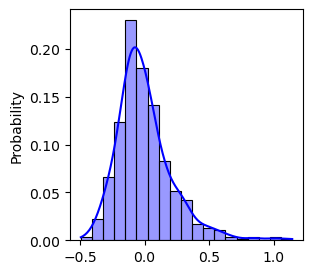

In [36]:
#Normality of residuals
#Plot histogram of residuals

plt.figure(figsize=(3,3))
sns.histplot(lm2.resid,stat="probability",
            kde=True, alpha=0.4,color="blue",
            bins= np.linspace(min(lm2.resid),max(lm2.resid),20))
plt.show()

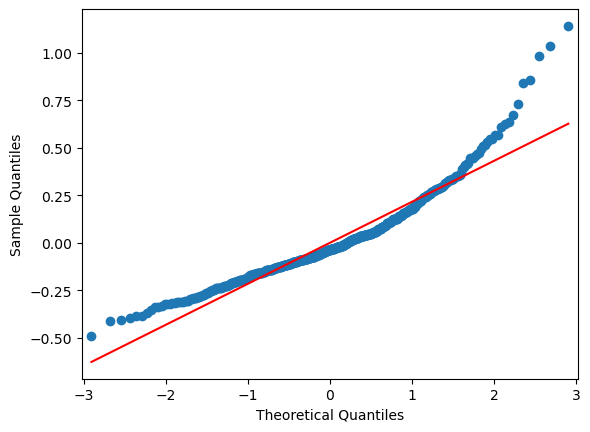

In [37]:
##QQ-plot
qqplot_lm=sm.qqplot(lm2.resid,line="s")

#### Note:
Although the residuals still do not exhibit a perfect normal distribution, they show improvement compared to the previous model.

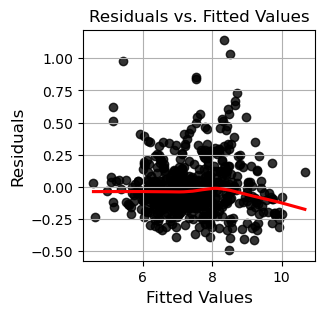

In [38]:
#Residuals vs. Fitted Values
plt.figure(figsize=(3,3))
sns.regplot(x=lm2.fittedvalues,y=lm2.resid,lowess=True,
           scatter_kws={"color":"black"},line_kws={'color':'red'})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

#### Note:

Heteroscedasticity Problem mitigated.

In [39]:
#Check Cook's distance
sum(lm2.get_influence().summary_frame().cooks_d>1)

0

### Regression Model based on t-test results

In [40]:
#Regression Model based on t-test results
lm3=sm.OLS(logy_train,X_train_constant[['const','Accept','P.Undergrad','Outstate',
                                 
                                 'Room.Board','Books', 'Expend','Grad.Rate']]).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1700.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:36:57   Log-Likelihood:                 45.388
No. Observations:                 543   AIC:                            -74.78
Df Residuals:                     535   BIC:                            -40.40
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0222      0.370     -8.174      0.000      -3.748      -2.296
Accept          1.0323      0.012     88.538      0.000       1.009       1.055
P.Undergrad    -0.0048      0.008     -0.626      0.532      -0.020       0.010
Outstate       -0.2004      0.042     -4.730      0.000      -0.284      -0.117
Room.Board      0.1744      0.055      3.189      0.002       0.067       0.282
Books           0.0994      0.037      2.718      0.007       0.028       0.171
Expend          0.2656      0.035      7.666      0.000       0.198       0.334
Grad.Rate       0.1170      0.039      3.002      0.003       0.040       0.194
==============================================================================
Omnibus:                      180.102   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.725
Skew:                           1.528   Prob(JB):                    8.10e-137
Kurtosis:                       7.286   Cond. No.                         750.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

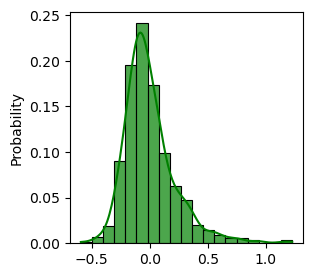

In [41]:
#Check Assumptions of Regression
#Normality of residuals
#Plot histogram of residuals
plt.figure(figsize=(3,3))
sns.histplot(lm3.resid, stat="probability",
            kde=True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm3.resid), max(lm3.resid), 20))
plt.show()

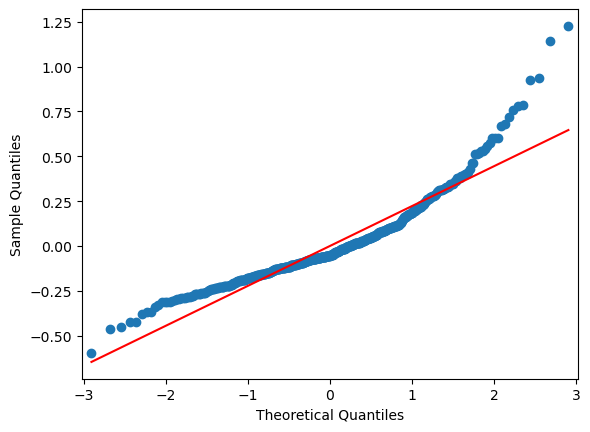

In [42]:
##QQ-plot
qqplot_lm3=sm.qqplot(lm3.resid,line='s')

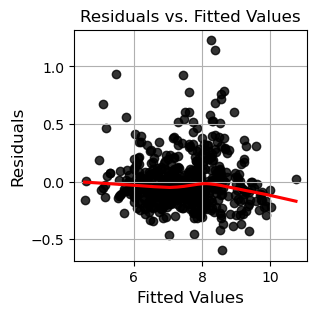

In [43]:
#Residuals vs. Fitted Values
plt.figure(figsize=(3,3))
sns.regplot(x=lm3.fittedvalues,y=lm3.resid,lowess=True,
             scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

In [44]:
#Check Cook's distance
sum(lm3.get_influence().summary_frame().cooks_d > 1)

0

### Test model on test Data


In [45]:
#log transformation
logy_test=np.log(y_test)
logy_test

293    6.133398
432    9.307739
637    9.860162
311    5.497168
299    8.296547
         ...   
455    6.774224
577    5.549076
69     8.904494
44     7.185387
589    6.739337
Name: Apps, Length: 234, dtype: float64

In [46]:
#Logarithmic Transformation test
X_test.iloc[:,1:]=np.log1p(X_test.iloc[:,1:])
X_test

,Private_Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
293,1.0,5.945421,5.164786,2.397895,3.784190,6.605298,4.025352,9.169623,8.423102,6.398595,6.621406,4.025352,4.553877,2.660260,3.784190,8.970051,3.951244
432,0.0,9.023890,8.065894,3.091042,4.007333,9.606563,7.178545,8.939843,8.317766,6.311735,7.741099,4.382027,4.477337,3.063391,2.639057,9.083870,4.174387
637,0.0,9.468156,8.495765,4.204693,4.532599,10.000886,7.200425,9.663516,8.446771,6.167516,7.378384,4.510860,4.595120,2.525729,3.295837,9.605620,4.477337
311,1.0,5.293305,4.418841,2.564949,3.526361,7.034388,5.820083,9.367430,8.575651,6.311735,6.692084,4.276666,4.488636,3.360375,2.944439,9.070503,4.077537
299,1.0,7.784473,6.350886,3.610918,4.094345,7.610358,5.424950,9.837935,8.655389,6.398595,6.908755,4.543295,4.574711,2.442347,3.663562,9.639913,4.532599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1.0,6.613384,5.337538,2.079442,3.663562,7.068172,7.246368,9.179984,8.482809,5.993961,7.090910,3.828641,4.510860,2.740840,2.397895,8.942853,4.204693
577,1.0,5.214936,4.700480,2.995732,3.737670,5.983936,3.663562,8.968396,8.134761,5.993961,7.313887,4.025352,4.262680,2.397895,2.772589,8.886547,3.988984
69,1.0,8.594710,8.437284,3.891820,4.418841,10.217532,7.134094,7.758333,8.183397,6.758095,7.107425,4.343805,4.343805,3.068053,3.713572,8.976768,3.526361
44,1.0,6.828712,5.652489,3.295837,4.007333,6.990257,4.406719,9.699227,8.193400,5.874931,6.573680,4.477337,4.564348,2.493205,3.295837,9.469469,4.248495


In [47]:
#Prediction Model on Test Data set
X_test_constant=sm.add_constant(X_test)
pred_lm=lm3.predict(X_test_constant[['const','Accept','P.Undergrad','Outstate',
                                 
                                 'Room.Board','Books', 'Expend','Grad.Rate']])
pred_lm=np.exp(pred_lm)

In [48]:
# Results
#Absolute error
abs_err_lm = abs(y_test - pred_lm)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.DataFrame({'Mean of AbsErrors': abs_err_lm.mean(),
                          'Median of AbsErrors': abs_err_lm.median(),
                          'SD of AbsErrors' :     abs_err_lm.std(),
                           'IQR of AbsErrors':     iqr(abs_err_lm),
                           'Min of AbsErrors':     abs_err_lm.min(),
                           'Max of AbsErrors':     abs_err_lm.max()}, 
                          index = ['LM_t-test'])
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.08621,146.952214,863.096458,441.710629,0.961053,7288.074021


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9652\2969581890.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xp,xp,'k',alpha = 0.9, linewidth = 2, color = 'red')


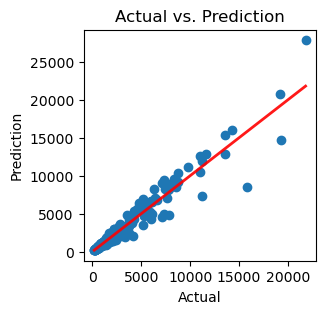

In [49]:
#Actual Vs. Prediction
plt.figure(figsize=(3,3))
plt.scatter(x=y_test,y=pred_lm)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp=np.linspace(y_test.min(),y_test.max())
plt.plot(xp,xp,'k',alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

### Model 2: Forward Stepwise Selection

In [50]:
#Define function to fit linear regression
def fit_lm(feature_set,y,x):
    reg_model=sm.OLS(y,x[['const']+list(feature_set)]).fit()
    return {'model':reg_model, 'RSquared': reg_model.rsquared}


def forward_func(features,y,x):
    res=[]
    remaining_features = [_ for _ in x.iloc[:,1:].columns if _ not in features]
    for f in remaining_features:
        res.append(fit_lm(features+[f],y,x))
    models=pd.DataFrame(res)
    #Choose the model with the Highest RSquared
    best_model= models.iloc[models["RSquared"].argmax()]
    return(best_model)


#Forward Selection Implementation
models_fw= pd.DataFrame(columns=['RSquared','model'])
features=[]
for i in range(1,len(X_train_constant.iloc[:,1:].columns)+1):
    models_fw.loc[i]= forward_func(features,logy_train,X_train_constant)
    features=models_fw.loc[i,'model'].model.exog_names[1:]

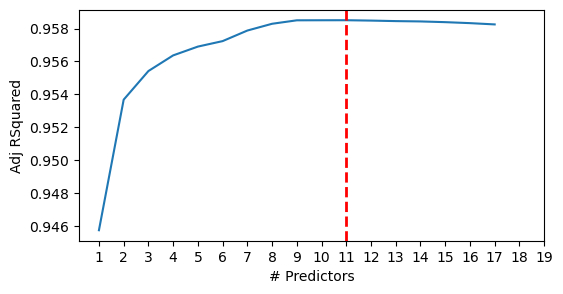

In [51]:
#Adj. RSquared
models_fw_adjrs = models_fw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_fw_adjrs

#Adj. RSquared Plot
plt.figure(figsize = (6, 3))
plt.plot(models_fw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_fw_adjrs.argmax() + 1, 
            color = 'red', 
            linewidth = 2, linestyle = '--')
plt.show()

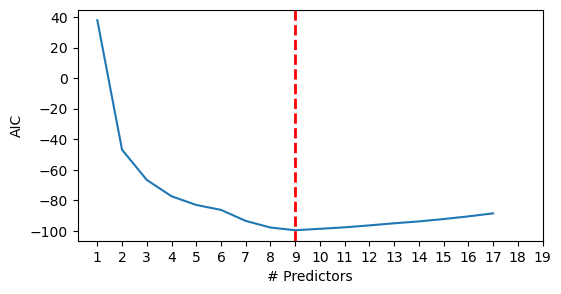

In [52]:
#AIC Plot
models_fw_aic = models_fw.apply(lambda row: row[1].aic, axis = 1)
plt.figure(figsize = (6, 3))
plt.plot(models_fw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_fw_aic.argmin() + 1, 
            color = 'red', 
            linewidth = 2, linestyle = '--')
plt.show()

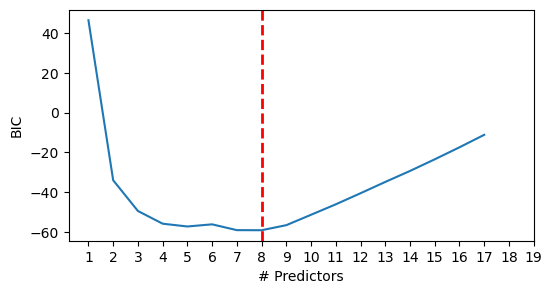

In [53]:
#BIC Plot
models_fw_bic = models_fw.apply(lambda row: row[1].bic, axis = 1)
plt.figure(figsize = (6, 3))
plt.plot(models_fw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_fw_bic.argmin() + 1, 
            color = 'red', 
            linewidth = 2, linestyle = '--')
plt.show()

In [54]:
pred_fw= models_fw.loc[9,'model'].predict(X_test_constant[models_fw.loc[9,'model'].model.exog_names])
pred_fw = np.exp(pred_fw)
pred_fw.head()

293      508.368316
432    12632.644315
637    21688.117926
311      282.887091
299     3583.396722
dtype: float64

In [55]:
#Absolute error
abs_err_fw = abs(y_test - pred_fw)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.concat([model_comp, 
                        pd.DataFrame({'Mean of AbsErrors':    abs_err_fw.mean(),
                                      'Median of AbsErrors' : abs_err_fw.median(),
                                      'SD of AbsErrors' :     abs_err_fw.std(),
                                      'IQR of AbsErrors':     iqr(abs_err_fw),
                                      'Min of AbsErrors':     abs_err_fw.min(),
                                      'Max of AbsErrors':     abs_err_fw.max()}, index = ['Forward Stepwise']), 
                       ])

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.086210,146.952214,863.096458,441.710629,0.961053,7288.074021
Forward Stepwise,459.513765,161.580734,816.703856,464.084715,0.969182,6587.488992


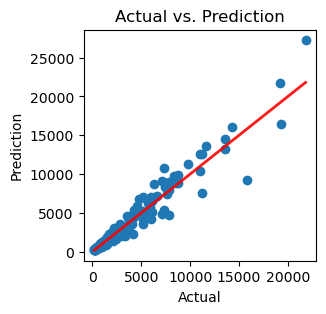

In [56]:
#Actual vs. Prediction
plt.figure(figsize = (3, 3))
plt.scatter(x = y_test, y = pred_fw)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

## Model3: Backward Selection

In [57]:
import itertools
def backward_func(features,y,x):
    res=[]
    for f in itertools.combinations(features,len(features)-1):
        res.append(fit_lm(f,y,x))
    models=pd.DataFrame(res)
    
    best_model = models.iloc[models['RSquared'].argmax()]
    return best_model


#Backward Selection Implementation
models_bw =pd.DataFrame(columns=['RSquared','model'])
features=X_train_constant.columns
while (len(features)>1):
    models_bw.loc[len(features)-1]=backward_func(features,logy_train,X_train_constant)
    features=models_bw.loc[len(features)-1]["model"].model.exog_names[1:]
    

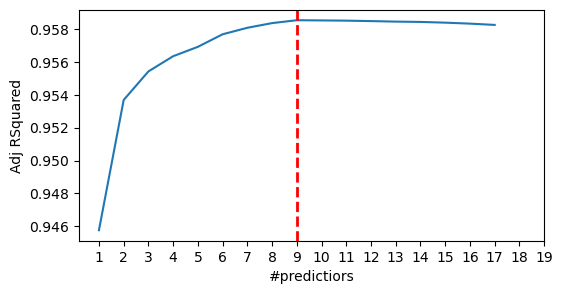

In [58]:
#Adj. RSquared
models_bw_adjrs=models_bw.apply(lambda row: row[1].rsquared_adj,axis=1)
models_bw_adjrs = models_bw_adjrs.sort_index()

plt.figure(figsize=(6,3))
plt.plot(models_bw_adjrs)
plt.xlabel("#predictiors")
plt.xticks(range(1,20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bw_adjrs.argmax()+1,
           color='red',
           linewidth=2,linestyle='--')
plt.show()

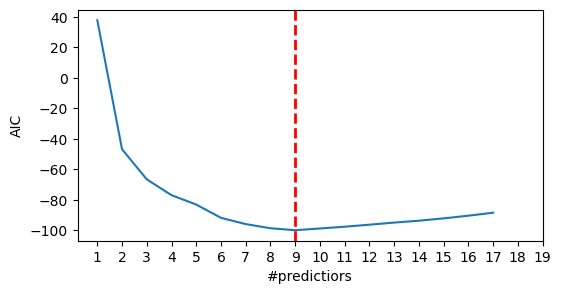

In [59]:
#AIC Plot
models_bw_aic=models_bw.apply(lambda row: row[1].aic,axis=1)
models_bw_aic= models_bw_aic.sort_index()
plt.figure(figsize=(6,3))
plt.plot(models_bw_aic)
plt.xlabel("#predictiors")
plt.xticks(range(1,20))
plt.ylabel('AIC')
plt.axvline(models_bw_aic.argmin() + 1, 
            color = 'red', 
            linewidth = 2, linestyle = '--')
plt.show()



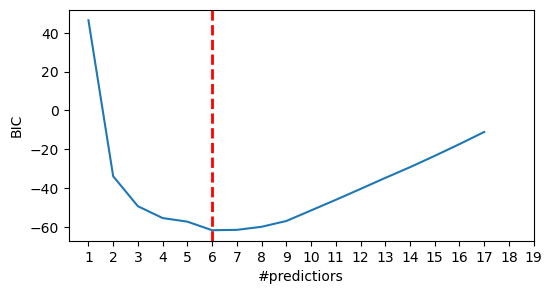

In [60]:
#BIC Plot
models_bw_bic = models_bw.apply(lambda row: row[1].bic,axis=1)
models_bw_bic=models_bw_bic.sort_index()
plt.figure(figsize=(6,3))
plt.plot(models_bw_bic)
plt.xlabel("#predictiors")
plt.xticks(range(1,20))
plt.ylabel('BIC')
plt.axvline(models_bw_bic.argmin() + 1, 
            color = 'red', 
            linewidth = 2, linestyle = '--')
plt.show()

In [61]:
pred_bw= models_bw.loc[9,'model'].predict(X_test_constant[models_bw.loc[9,'model'].model.exog_names])
pred_bw = np.exp(pred_bw)
pred_bw.head()

293      494.022911
432    12582.252210
637    21887.172108
311      283.973604
299     3622.603011
dtype: float64

In [62]:
#Absolute error
abs_err_bw = abs(y_test - pred_bw)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.concat([model_comp, 
                        pd.DataFrame({'Mean of AbsErrors':    abs_err_bw.mean(),
                                      'Median of AbsErrors' : abs_err_bw.median(),
                                      'SD of AbsErrors' :     abs_err_bw.std(),
                                      'IQR of AbsErrors':     iqr(abs_err_bw),
                                      'Min of AbsErrors':     abs_err_bw.min(),
                                      'Max of AbsErrors':     abs_err_bw.max()}, index = ['Backward Stepwise']), 
                       ])

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.086210,146.952214,863.096458,441.710629,0.961053,7288.074021
Forward Stepwise,459.513765,161.580734,816.703856,464.084715,0.969182,6587.488992
Backward Stepwise,466.219876,156.201853,830.915477,470.277224,0.045529,6503.217697


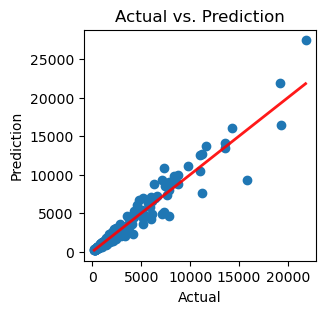

In [63]:
#Actual vs. Prediction
plt.figure(figsize = (3, 3))
plt.scatter(x = y_test, y = pred_bw)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

### Model 4: Ridge Regression

In [64]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
x_train_scaled=StandardScaler().fit_transform(X_train_constant)
x_train_scaled

array([[ 0.        ,  0.59223835, -0.60998221, ..., -0.08392451,
        -1.17374576, -0.78470103],
       [ 0.        ,  0.59223835,  0.18788883, ..., -0.00319298,
         0.15036707, -0.03116353],
       [ 0.        ,  0.59223835,  0.62837173, ...,  0.68658509,
        -0.44058712,  1.3828864 ],
       ...,
       [ 0.        ,  0.59223835, -0.37382986, ...,  1.00703349,
         0.69498048,  0.75061161],
       [ 0.        ,  0.59223835, -1.18697023, ..., -0.00319298,
        -0.69233584,  0.79133247],
       [ 0.        ,  0.59223835, -0.51864259, ...,  0.73655499,
         0.80541397,  0.70938488]])

In [65]:
#K-fold Cross Validation to Choose the Best Model
from sklearn.model_selection import cross_val_score
lambda_grid = 10**np.linspace(3,-3,100)
cv_errors=np.zeros(shape=len(lambda_grid))
for i in range(len(lambda_grid)):
    ridgereg=Ridge(alpha=lambda_grid[i])
    scores=cross_val_score(estimator=ridgereg,
                          X=x_train_scaled,
                          y=logy_train,
                          scoring='neg_root_mean_squared_error',
                          cv=10, n_jobs=-1)
    cv_errors[i] = scores.mean() 

In [66]:
best_lambda=lambda_grid[np.argmax(cv_errors)]
best_lambda

0.6135907273413169

In [67]:
#Best Model Coefs:
ridgereg=Ridge(alpha=best_lambda)
ridge_reg=ridgereg.fit(x_train_scaled,logy_train)
ridge_reg.coef_

array([ 0.        , -0.01582226,  0.88330952,  0.05554116,  0.01951183,
        0.02408673,  0.07718576, -0.03025039, -0.050611  ,  0.05647766,
        0.02309429,  0.00521119,  0.00978395, -0.02011503,  0.00240578,
       -0.0116679 ,  0.0916071 ,  0.02568756])

In [68]:
#Prediction
x_test_scaled =StandardScaler().fit_transform(X_test_constant)
pred_ridge= ridge_reg.predict(x_test_scaled)
pred_ridge = np.exp(pred_ridge)
pred_ridge

array([  526.21287656, 13038.26722625, 22960.82384116,   303.02996401,
        3892.04236364,  1709.86691166,  2507.39650251,   266.22145152,
        3396.88162541,  2179.84358129,  1356.14438254,  2603.31420465,
        1081.00370647,   316.07614737,  1375.09673128,   837.99893093,
         201.48179271,  1188.77256188,  8640.53759001,  1130.06739794,
         437.17535971,  1359.62851136,  2716.28378977,   580.21861225,
         631.30881589,  8606.54694471,   676.07239358,   683.18334785,
        7653.35287001,  5221.34206368,   509.26747376,   507.3784379 ,
        4523.00180491,  2133.36381281,  3106.62840169,  1233.5229921 ,
         595.47831433,  1144.57334462,  7183.98096107,  4918.21109278,
        2230.54047088,  1361.72373332,  6371.97925306,   683.42419938,
        3417.53163983,   405.89161508,   668.95186824,  4984.40078916,
        1260.80456434, 14018.4050352 ,  2437.0616364 ,  3388.78052741,
         517.17533705,  7378.58031242,  1411.96234415,   581.9549003 ,
      

In [69]:
#Absolute error
abs_err_ridge = abs(y_test - pred_ridge)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.concat([model_comp, 
                        pd.DataFrame({'Mean of AbsErrors':    abs_err_ridge.mean(),
                                      'Median of AbsErrors' : abs_err_ridge.median(),
                                      'SD of AbsErrors' :     abs_err_ridge.std(),
                                      'IQR of AbsErrors':     iqr(abs_err_ridge),
                                      'Min of AbsErrors':     abs_err_ridge.min(),
                                      'Max of AbsErrors':     abs_err_ridge.max()}, index = ['Ridge Reg']), 
                       ])

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.086210,146.952214,863.096458,441.710629,0.961053,7288.074021
Forward Stepwise,459.513765,161.580734,816.703856,464.084715,0.969182,6587.488992
Backward Stepwise,466.219876,156.201853,830.915477,470.277224,0.045529,6503.217697
Ridge Reg,518.494657,198.902233,827.179071,503.015363,0.383152,5774.659280


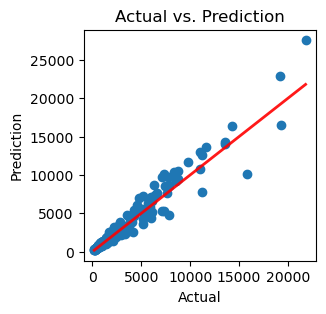

In [70]:
#Actual vs. Prediction
plt.figure(figsize = (3, 3))
plt.scatter(x = y_test, y = pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

### Model 4: Lasso Regression

In [71]:
#K-fold Cross Validation to Choose the Best Model
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = len(lambda_grid)) #to save cv results

for i in range(len(lambda_grid)):
    lassoereg = Lasso(alpha = lambda_grid[i])
    scores = cross_val_score(estimator = lassoereg, 
                             X = x_train_scaled, y = logy_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean() 


In [72]:
best_lamda = lambda_grid[np.argmax(cv_errors)]
best_lamda

0.004641588833612773

### Model 4: Prediction on Test Dataset

In [73]:
#Best Model Coefs:
lassoreg = Lasso(alpha = best_lamda)
lasso_reg = lassoreg.fit(x_train_scaled, logy_train)
lasso_reg.coef_

array([ 0.        , -0.01010726,  0.89018057,  0.04748803,  0.02302085,
        0.01633897,  0.07496612, -0.0137649 , -0.02873099,  0.03979448,
        0.02061828,  0.        ,  0.        , -0.        ,  0.        ,
       -0.00445619,  0.07810937,  0.01688262])

In [74]:
#Prediction
pred_lasso = lasso_reg.predict(x_test_scaled)
pred_lasso = np.exp(pred_lasso)
pred_lasso

array([  542.67758961, 12708.85886627, 22836.73750899,   307.86718655,
        3902.35223478,  1804.16929707,  2524.89700438,   271.77422854,
        3431.82050874,  2212.84803426,  1370.51790482,  2590.22800693,
        1072.67707749,   313.49114161,  1358.9306175 ,   880.43881034,
         214.5971251 ,  1206.71947455,  8658.35546637,  1106.89333764,
         435.50770955,  1382.08401995,  2842.49064589,   585.86091769,
         607.185031  ,  8546.39846243,   676.61010478,   691.84046444,
        7589.24950638,  5216.75196406,   482.18957451,   525.60569776,
        4582.93090532,  2060.2004385 ,  3209.44384729,  1243.29466944,
         591.35458922,  1147.22091161,  7291.32967207,  4898.92984028,
        2191.28534598,  1364.06016522,  6341.75330051,   704.16169297,
        3467.56636439,   399.6207375 ,   688.64434566,  5200.51642646,
        1183.99040343, 13932.17372598,  2512.48729198,  3376.26412085,
         523.86017462,  7303.79241855,  1440.54944441,   607.56741188,
      

In [75]:
#Absolute error
abs_err_lasso = abs(y_test - pred_lasso)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.concat([model_comp, pd.DataFrame({'Mean of AbsErrors':    abs_err_lasso.mean(),
                                             'Median of AbsErrors' : abs_err_lasso.median(),
                                             'SD of AbsErrors' :     abs_err_lasso.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_lasso),
                                             'Min of AbsErrors':     abs_err_lasso.min(),
                                             'Max of AbsErrors':     abs_err_lasso.max()}, index = ['Lasso Reg']), 
                       ])

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.086210,146.952214,863.096458,441.710629,0.961053,7288.074021
Forward Stepwise,459.513765,161.580734,816.703856,464.084715,0.969182,6587.488992
Backward Stepwise,466.219876,156.201853,830.915477,470.277224,0.045529,6503.217697
Ridge Reg,518.494657,198.902233,827.179071,503.015363,0.383152,5774.659280
Lasso Reg,502.364325,201.513220,820.834452,490.372159,0.249506,6092.136353


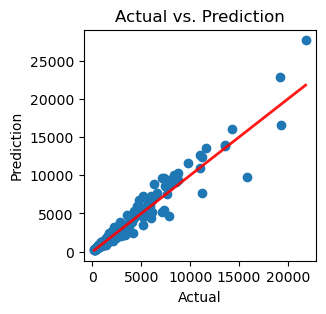

In [76]:
#Actual vs. Prediction
plt.figure(figsize = (3, 3))
plt.scatter(x = y_test, y = pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

## decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
import itertools

max_depth = [3, 5, 7]
min_samples_leaf = [3, 5, 10]
ccp_alpha = [0.1,0.01,0.001,0.0001]
grid = list(itertools.product(max_depth, min_samples_leaf, ccp_alpha))
grid = pd.DataFrame(data = grid, 
                    index = range(1, 37), 
                    columns = ['max_depth', 'min_samples_leaf', 'ccp_alpha'])
grid

,max_depth,min_samples_leaf,ccp_alpha
1,3,3,0.1000
2,3,3,0.0100
3,3,3,0.0010
4,3,3,0.0001
5,3,5,0.1000
6,3,5,0.0100
7,3,5,0.0010
8,3,5,0.0001
9,3,10,0.1000
10,3,10,0.0100


In [79]:
#K-fold Cross Validation to Choose the Best Model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = grid.shape[0]) #to save cv results

for i in range(grid.shape[0]):
    reg_tree = DecisionTreeRegressor(max_depth = grid.iloc[i, 0], 
                                     min_samples_leaf = grid.iloc[i, 1], 
                                     ccp_alpha = grid.iloc[i, 2])
    scores = cross_val_score(estimator = reg_tree, 
                             X =X_train, y = logy_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv =10, n_jobs = -1)
    cv_errors[i] = scores.mean() 

In [80]:
#Best Model
grid.iloc[np.argmax(cv_errors), :]

max_depth           5.0000
min_samples_leaf    5.0000
ccp_alpha           0.0001
Name: 20, dtype: float64

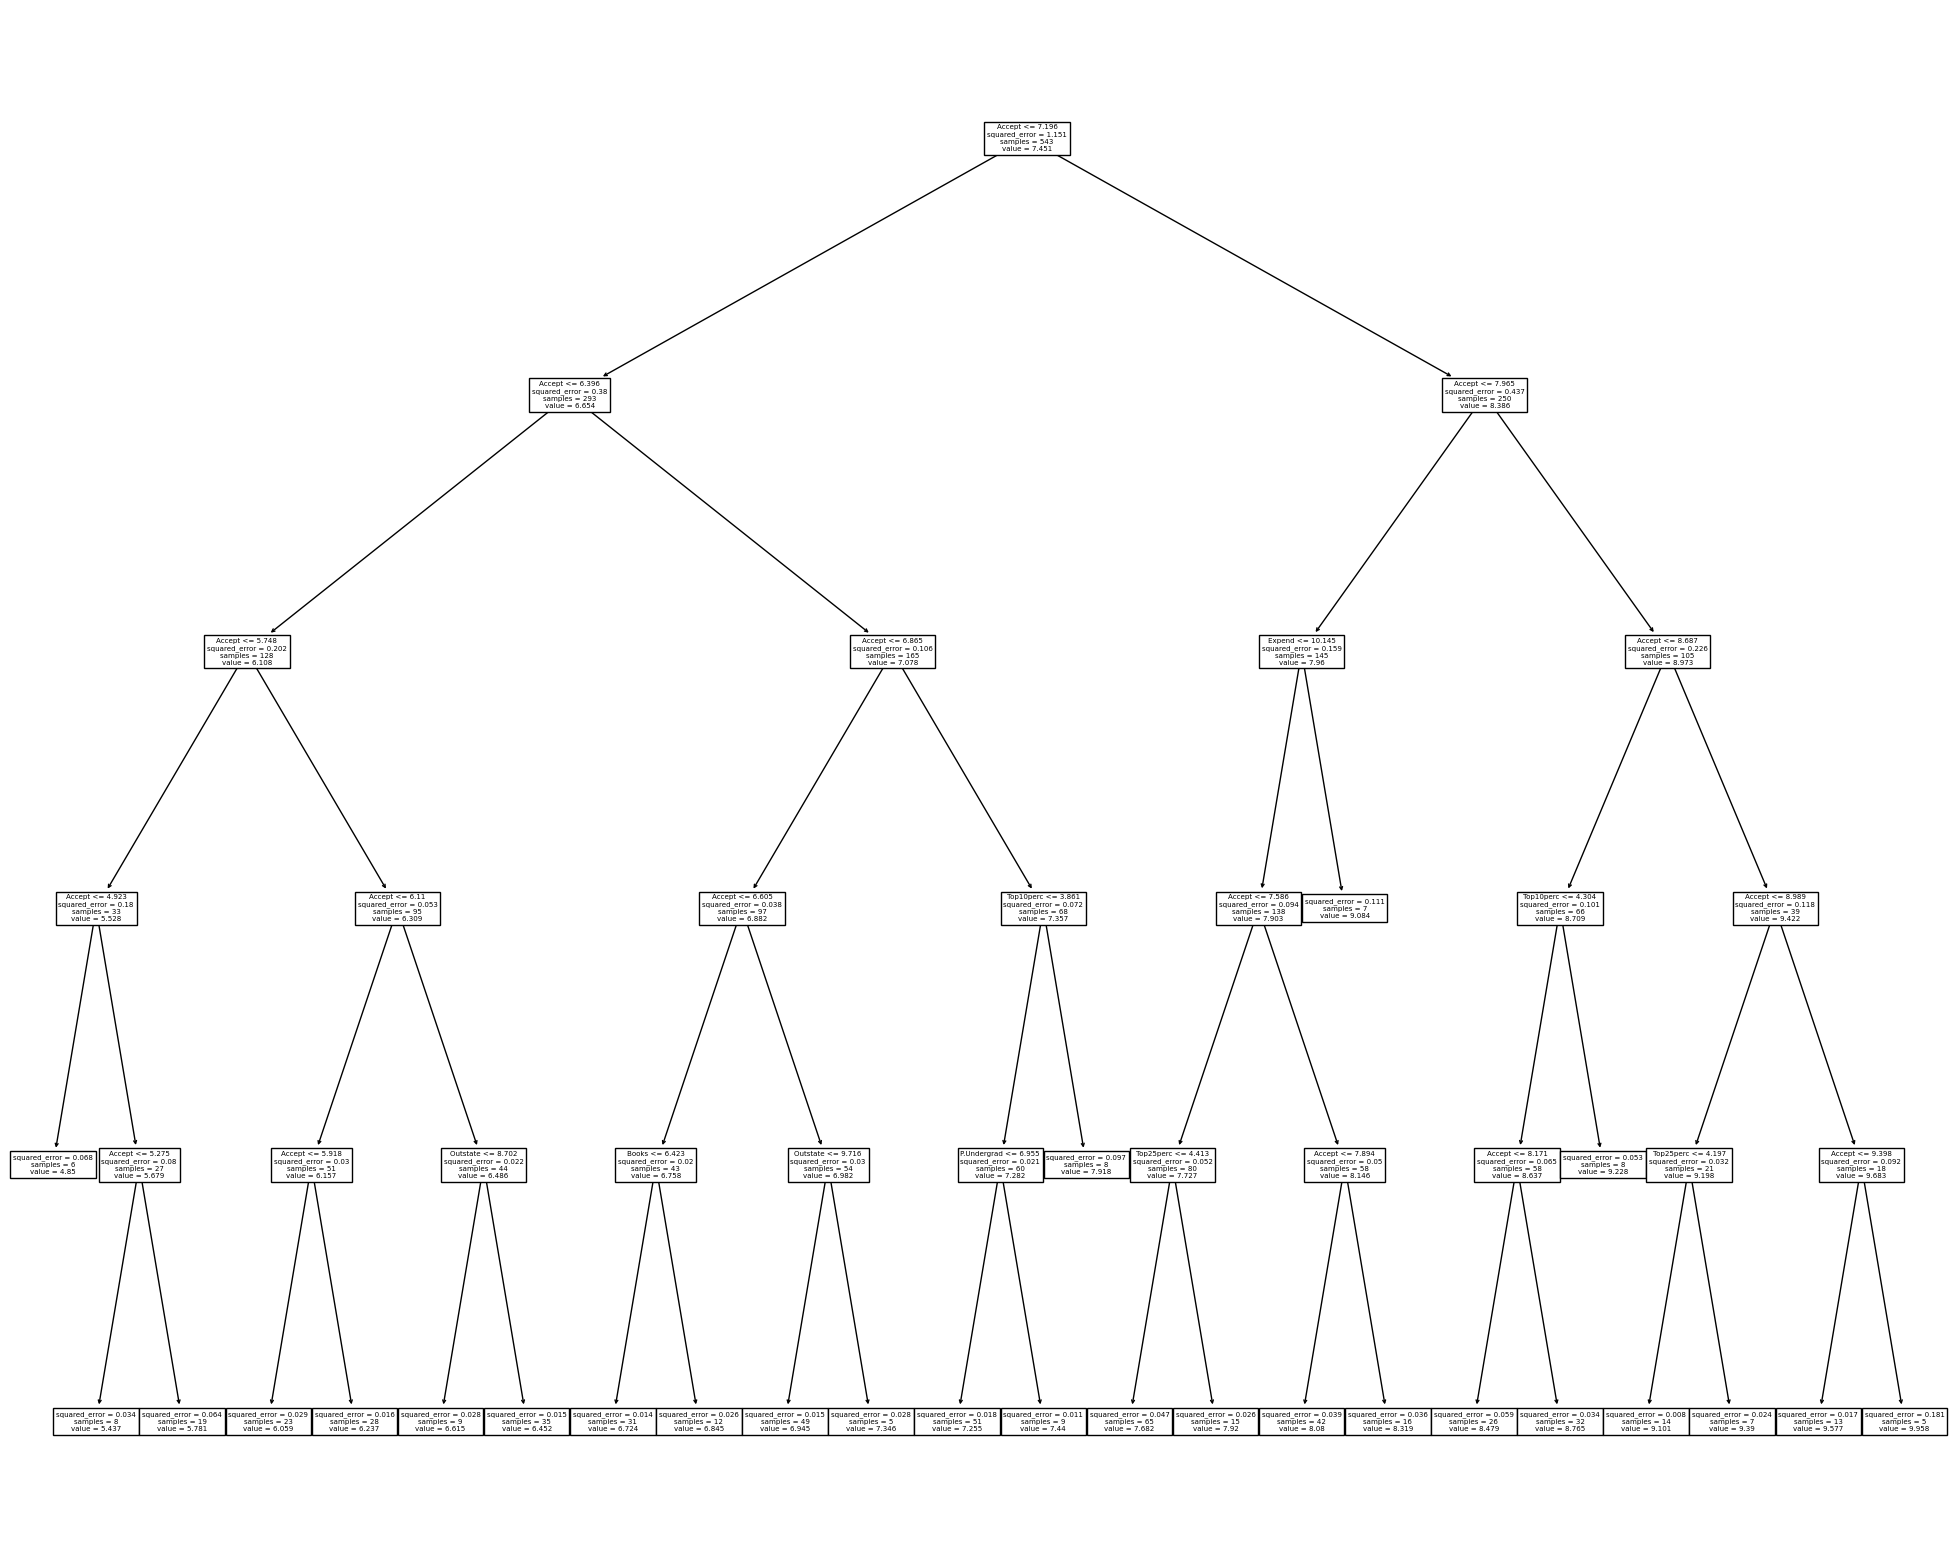

In [81]:
#The Best Decision Tree Model Using All Variables
reg_tree = DecisionTreeRegressor(max_depth = 5, 
                                 min_samples_leaf = 5, 
                                 ccp_alpha =  0.0001)
tree_res = reg_tree.fit(X_train, logy_train)

#Plot the Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_res, feature_names = X_train.columns)
plt.show()

In [82]:
pred_tree = tree_res.predict(X_test)
pred_tree = np.exp(pred_tree)
pred_tree

array([  511.50173809, 14428.22233397, 21130.60328329,   324.04130094,
        3229.78518466,  2168.95704737,  2168.95704737,   229.74357019,
        4099.89106621,  2168.95704737,  1414.58581346,  2168.95704737,
         831.97439524,   229.74357019,  1414.58581346,   831.97439524,
         229.74357019,  1037.6654057 ,  6406.90408245,   939.39854674,
         324.04130094,  1037.6654057 ,  3229.78518466,   511.50173809,
         511.50173809,  6406.90408245,   634.18131687,   634.18131687,
        6406.90408245,  6406.90408245,   427.83982171,   511.50173809,
        4814.00968067,  2747.33915019,  3229.78518466,  1037.6654057 ,
         511.50173809,  1037.6654057 ,  6406.90408245,  4814.00968067,
        2168.95704737,  1037.6654057 ,  6406.90408245,   634.18131687,
        4099.89106621,   324.04130094,   634.18131687,  6406.90408245,
         831.97439524, 11973.11053959,  3229.78518466,  3229.78518466,
         511.50173809,  6406.90408245,  1414.58581346,   511.50173809,
      

In [83]:
#Absolute error
abs_err_tree = abs(y_test - pred_tree)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.concat([model_comp,
                        pd.DataFrame({'Mean of AbsErrors':    abs_err_tree.mean(),
                                      'Median of AbsErrors' : abs_err_tree.median(),
                                      'SD of AbsErrors' :     abs_err_tree.std(),
                                      'IQR of AbsErrors':     iqr(abs_err_tree),
                                      'Min of AbsErrors':     abs_err_tree.min(),
                                      'Max of AbsErrors':     abs_err_tree.max()}, index = ['Decision Tree Reg']), 
                        ])

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.086210,146.952214,863.096458,441.710629,0.961053,7288.074021
Forward Stepwise,459.513765,161.580734,816.703856,464.084715,0.969182,6587.488992
Backward Stepwise,466.219876,156.201853,830.915477,470.277224,0.045529,6503.217697
Ridge Reg,518.494657,198.902233,827.179071,503.015363,0.383152,5774.659280
Lasso Reg,502.364325,201.513220,820.834452,490.372159,0.249506,6092.136353
Decision Tree Reg,518.037689,171.076639,819.782323,568.872445,0.501738,5673.040540


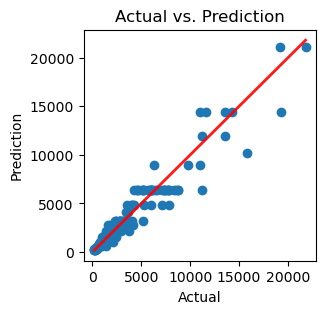

In [84]:
#Actual vs. Prediction
plt.figure(figsize = (3, 3))
plt.scatter(x = y_test, y = pred_tree)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

### Model 6: Bagging

In [85]:
from sklearn.ensemble import RandomForestRegressor
#Create Hyper-parameters grid
import itertools

max_depth = [5, 7, 10]
min_samples_leaf = [5, 10, 15]
ccp_alpha = [0.0001, 0.001, 0.01]
grid = list(itertools.product(max_depth, min_samples_leaf, ccp_alpha))
grid = pd.DataFrame(data = grid, 
                    index = range(1, 28), 
                    columns = ['max_depth', 'min_samples_leaf', 'ccp_alpha'])
grid

,max_depth,min_samples_leaf,ccp_alpha
1,5,5,0.0001
2,5,5,0.0010
3,5,5,0.0100
4,5,10,0.0001
5,5,10,0.0010
6,5,10,0.0100
7,5,15,0.0001
8,5,15,0.0010
9,5,15,0.0100
10,7,5,0.0001


In [86]:
#K-Fold Cross Validation for Choosing Hyper-parameters
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = grid.shape[0]) #to save cv results

for i in range(grid.shape[0]):
    baggingreg = RandomForestRegressor(max_features = 17,
                                       max_depth=grid.iloc[i,0], 
                                       min_samples_leaf=grid.iloc[i,1],
                                       ccp_alpha= grid.iloc[i,2],
                                    
                                   n_estimators = 500)
    scores = cross_val_score(estimator = baggingreg, 
                             X = X_train, y = logy_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean() 

In [87]:
#Best Model
grid.iloc[np.argmax(cv_errors), :]

max_depth           10.0000
min_samples_leaf     5.0000
ccp_alpha            0.0001
Name: 19, dtype: float64

In [88]:
#The Best Decision Tree Model Using All Variables

baggingreg = RandomForestRegressor(max_features = 17,
                                   max_depth= 7 ,
                                   min_samples_leaf=5,
                                   ccp_alpha = 0.0001,
                                    random_state=543,
                                   n_estimators = 500)
bagging_reg = baggingreg.fit(X_train, logy_train)
pred_bagging = bagging_reg.predict(X_test)
pred_bagging = np.exp(pred_bagging)
pred_bagging

array([  492.23844488, 12606.32077593, 18502.11173697,   260.37524526,
        3723.2371076 ,  1867.85815267,  2715.86866399,   251.25737921,
        4008.22890858,  2046.64142612,  1372.23057587,  2247.56634755,
         925.07920649,   246.77983012,  1413.89560875,   893.3587274 ,
         213.33243774,   993.53303406,  7011.68250699,   847.33586546,
         382.26368754,  1207.22373066,  2879.44424475,   499.34164936,
         503.59005859,  6668.65237449,   652.86584685,   666.82138056,
        6337.02906802,  6159.96645239,   409.0000236 ,   497.50444473,
        4424.83876574,  2369.43191954,  3298.28527802,  1074.84937829,
         513.81451262,  1075.79772792,  6403.78539899,  4617.95901438,
        1788.67368517,  1288.79482498,  6177.9178805 ,   665.6074508 ,
        3960.04740097,   348.61524438,   655.54160266,  5703.56851743,
        1021.34854024, 11800.39060613,  2977.49508935,  3176.31740576,
         502.12052729,  7334.16936799,  1373.65566927,   517.90886593,
      

In [89]:
#Absolute error
abs_err_bagging = abs(y_test - pred_bagging)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.concat([model_comp,
                     pd.DataFrame({'Mean of AbsErrors':    abs_err_bagging.mean(),
                                             'Median of AbsErrors' : abs_err_bagging.median(),
                                             'SD of AbsErrors' :     abs_err_bagging.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bagging),
                                             'Min of AbsErrors':     abs_err_bagging.min(),
                                             'Max of AbsErrors':     abs_err_bagging.max()}, index = ['Bagging Reg']), 
                       ])

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.086210,146.952214,863.096458,441.710629,0.961053,7288.074021
Forward Stepwise,459.513765,161.580734,816.703856,464.084715,0.969182,6587.488992
Backward Stepwise,466.219876,156.201853,830.915477,470.277224,0.045529,6503.217697
Ridge Reg,518.494657,198.902233,827.179071,503.015363,0.383152,5774.659280
Lasso Reg,502.364325,201.513220,820.834452,490.372159,0.249506,6092.136353
Decision Tree Reg,518.037689,171.076639,819.782323,568.872445,0.501738,5673.040540
Bagging Reg,430.163893,137.048747,808.293685,419.775668,0.220170,6762.980510


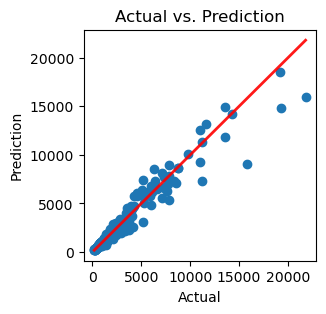

In [90]:
#Actual vs. Prediction
plt.figure(figsize = (3, 3))
plt.scatter(x = y_test, y = pred_bagging)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

## Model 7: Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor
#Create Hyper-parameters grid
import itertools

max_depth = [5, 7, 10]
min_samples_leaf = [5, 10, 15]
max_features =[6,9,10]
ccp_alpha= [0.0001, 0.001, 0.01]
grid = list(itertools.product(max_depth, min_samples_leaf,max_features, ccp_alpha))
grid = pd.DataFrame(data = grid, 
                    index = range(1, 82), 
                    columns = ['max_depth', 'min_samples_leaf','max_features', 'ccp_alpha'])
grid

,max_depth,min_samples_leaf,max_features,ccp_alpha
1,5,5,6,0.0001
2,5,5,6,0.0010
3,5,5,6,0.0100
4,5,5,9,0.0001
5,5,5,9,0.0010
...,...,...,...,...
77,10,15,9,0.0010
78,10,15,9,0.0100
79,10,15,10,0.0001
80,10,15,10,0.0010


In [92]:
#K-Fold Cross Validation for Choosing Hyper-parameters
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = grid.shape[0]) #to save cv results

for i in range(grid.shape[0]):
    rf = RandomForestRegressor(max_features = grid.iloc[i,2],
                                       max_depth=grid.iloc[i,0], 
                                       min_samples_leaf=grid.iloc[i,1],
                                       ccp_alpha= grid.iloc[i,3],
                                   n_estimators = 1000)
    scores = cross_val_score(estimator = rf, 
                             X = X_train, y = logy_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean() 

In [93]:
#Best Model
grid.iloc[np.argmax(cv_errors), :]

max_depth           10.0000
min_samples_leaf     5.0000
max_features        10.0000
ccp_alpha            0.0001
Name: 61, dtype: float64

In [94]:
#The Best Decision Tree Model Using All Variables

rf = RandomForestRegressor(max_features = 10,
                                   max_depth= 10 ,
                                   min_samples_leaf=5,
                                   ccp_alpha = 0.0001,
                                   random_state=464,
                                   n_estimators = 1000)
rf_reg = rf.fit(X_train, logy_train)
pred_rf= rf_reg.predict(X_test)
pred_rf = np.exp(pred_rf)
pred_rf

array([  501.75977198, 12013.46053487, 17636.4607919 ,   258.72389721,
        3642.60382621,  1880.24617897,  2698.14663448,   269.95770545,
        3933.5083048 ,  2058.70088268,  1316.19122803,  2196.64093714,
         930.6310345 ,   245.00793413,  1382.9991699 ,   874.09698333,
         212.59431413,  1099.48732009,  7259.03796362,   916.35505702,
         385.30674636,  1208.20105617,  2921.91482746,   508.8885147 ,
         488.76674168,  7021.37841202,   615.81719962,   677.33371298,
        6569.2139014 ,  5861.37379725,   450.36747783,   522.78259927,
        4736.97930511,  2045.33590576,  3378.58282014,  1083.83996572,
         510.4691759 ,  1051.37474853,  6719.3320923 ,  4921.29021647,
        1840.32316687,  1244.16133714,  6304.69133094,   623.53149921,
        3782.36963567,   299.34022212,   660.3502615 ,  5699.0531675 ,
        1028.5419755 , 11761.90287698,  3025.22506071,  3185.53972242,
         517.44895356,  7028.04142449,  1386.04439805,   538.05322725,
      

In [95]:
pred_rf = rf_reg.predict(X_test)
pred_rf = np.exp(pred_rf)
pred_rf

array([  501.75977198, 12013.46053487, 17636.4607919 ,   258.72389721,
        3642.60382621,  1880.24617897,  2698.14663448,   269.95770545,
        3933.5083048 ,  2058.70088268,  1316.19122803,  2196.64093714,
         930.6310345 ,   245.00793413,  1382.9991699 ,   874.09698333,
         212.59431413,  1099.48732009,  7259.03796362,   916.35505702,
         385.30674636,  1208.20105617,  2921.91482746,   508.8885147 ,
         488.76674168,  7021.37841202,   615.81719962,   677.33371298,
        6569.2139014 ,  5861.37379725,   450.36747783,   522.78259927,
        4736.97930511,  2045.33590576,  3378.58282014,  1083.83996572,
         510.4691759 ,  1051.37474853,  6719.3320923 ,  4921.29021647,
        1840.32316687,  1244.16133714,  6304.69133094,   623.53149921,
        3782.36963567,   299.34022212,   660.3502615 ,  5699.0531675 ,
        1028.5419755 , 11761.90287698,  3025.22506071,  3185.53972242,
         517.44895356,  7028.04142449,  1386.04439805,   538.05322725,
      

In [96]:
#Absolute error
abs_err_rf = abs(y_test - pred_rf)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.concat([model_comp,
                        pd.DataFrame({'Mean of AbsErrors':    abs_err_rf.mean(),
                                      'Median of AbsErrors' : abs_err_rf.median(),
                                      'SD of AbsErrors' :     abs_err_rf.std(),
                                      'IQR of AbsErrors':     iqr(abs_err_rf),
                                      'Min of AbsErrors':     abs_err_rf.min(),
                                      'Max of AbsErrors':     abs_err_rf.max()}, index = ['Random Forest Reg']), 
                       ])

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.086210,146.952214,863.096458,441.710629,0.961053,7288.074021
Forward Stepwise,459.513765,161.580734,816.703856,464.084715,0.969182,6587.488992
Backward Stepwise,466.219876,156.201853,830.915477,470.277224,0.045529,6503.217697
Ridge Reg,518.494657,198.902233,827.179071,503.015363,0.383152,5774.659280
Lasso Reg,502.364325,201.513220,820.834452,490.372159,0.249506,6092.136353
Decision Tree Reg,518.037689,171.076639,819.782323,568.872445,0.501738,5673.040540
Bagging Reg,430.163893,137.048747,808.293685,419.775668,0.220170,6762.980510
Random Forest Reg,426.099222,163.405243,789.160194,396.472075,0.508351,6416.049342


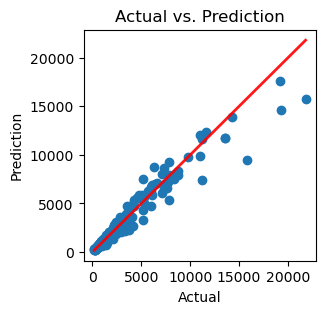

In [97]:
#Actual vs. Prediction
plt.figure(figsize = (3, 3))
plt.scatter(x = y_test, y = pred_rf)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

## model 8: Gradient Boost


In [98]:
from sklearn.ensemble import GradientBoostingRegressor
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
learning_rate = [0.01, 0.2,0.015]
subsample = [0.6, 0.8, 1]
max_depth = [1,3, 5, 9]
min_samples_leaf=[5,10,15]
grid = list(itertools.product(learning_rate, subsample, max_depth,min_samples_leaf))
grid = pd.DataFrame(data = grid, 
                    index = range(1, 109), 
                    columns = ['learning_rate', 'subsample', 'max_depth','min_samples_leaf'])
grid

,learning_rate,subsample,max_depth,min_samples_leaf
1,0.010,0.6,1,5
2,0.010,0.6,1,10
3,0.010,0.6,1,15
4,0.010,0.6,3,5
5,0.010,0.6,3,10
...,...,...,...,...
104,0.015,1.0,5,10
105,0.015,1.0,5,15
106,0.015,1.0,9,5
107,0.015,1.0,9,10


In [99]:
#K-fold Cross Validation to Choose the Best Model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = grid.shape[0]) #to save cv results

for i in range(grid.shape[0]):
    boostingreg = GradientBoostingRegressor(learning_rate = grid.iloc[i, 0], 
                                            subsample = grid.iloc[i, 1], 
                                            max_depth = grid.iloc[i, 2],
                                            min_samples_leaf = grid.iloc[i,3],
                                            n_estimators = 1000)
    scores = cross_val_score(estimator = boostingreg, 
                             X = X_train, y = logy_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean() 


In [100]:
grid.iloc[np.argmax(cv_errors), :]

learning_rate       0.015
subsample           0.600
max_depth           3.000
min_samples_leaf    5.000
Name: 76, dtype: float64

In [101]:
boosting_reg = GradientBoostingRegressor(learning_rate = 0.015,  
                                         n_estimators = 1000,   
                                         subsample = 0.6,                       
                                         max_depth = 3,        
                                         min_samples_leaf = 5, 
                                         random_state = 463)
boosting_res = boosting_reg.fit(X_train, logy_train)

In [102]:
pred_boosting = boosting_res.predict(X_test)
pred_boosting = np.exp(pred_boosting)
pred_boosting

array([  462.46520822, 11200.62627053, 22551.79807021,   250.84463803,
        4026.39819011,  1793.35671849,  2707.12798039,   249.74714566,
        3325.50276801,  2069.50467738,  1342.58787545,  2296.74780275,
         958.08211936,   273.52552802,  1453.3259274 ,   879.48284927,
         192.25388677,   971.3454971 ,  7407.57805087,   945.12899953,
         360.69550095,  1118.25228497,  2550.12925622,   515.01542685,
         485.22617789,  6611.83036652,   659.17015545,   601.72737715,
        6783.54171276,  6080.36439013,   496.58728713,   481.66861748,
        4344.54092884,  2214.50588259,  3573.01734707,   962.85982261,
         513.82602427,   996.8400341 ,  5799.48494119,  4883.86490827,
        1808.43598812,  1177.06782028,  6312.9007331 ,   659.26455057,
        3526.2235481 ,   339.26762186,   658.39954278,  5643.26083369,
         935.29160393, 11921.51357119,  2814.69615272,  3101.89254437,
         494.93486578,  7392.48381264,  1377.38439534,   512.11812079,
      

In [103]:
#Absolute error
abs_err_boosting = abs(y_test - pred_boosting)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.concat([model_comp, 
                       pd.DataFrame({'Mean of AbsErrors':    abs_err_boosting.mean(),
                                     'Median of AbsErrors' : abs_err_boosting.median(),
                                     'SD of AbsErrors' :     abs_err_boosting.std(),
                                     'IQR of AbsErrors':     iqr(abs_err_boosting),
                                     'Min of AbsErrors':     abs_err_boosting.min(),
                                     'Max of AbsErrors':     abs_err_boosting.max()}, index = ['GB Reg']), 
                       ])

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.086210,146.952214,863.096458,441.710629,0.961053,7288.074021
Forward Stepwise,459.513765,161.580734,816.703856,464.084715,0.969182,6587.488992
Backward Stepwise,466.219876,156.201853,830.915477,470.277224,0.045529,6503.217697
Ridge Reg,518.494657,198.902233,827.179071,503.015363,0.383152,5774.659280
Lasso Reg,502.364325,201.513220,820.834452,490.372159,0.249506,6092.136353
Decision Tree Reg,518.037689,171.076639,819.782323,568.872445,0.501738,5673.040540
Bagging Reg,430.163893,137.048747,808.293685,419.775668,0.220170,6762.980510
Random Forest Reg,426.099222,163.405243,789.160194,396.472075,0.508351,6416.049342
GB Reg,397.301714,136.052151,784.956960,367.819066,0.423519,6098.071820


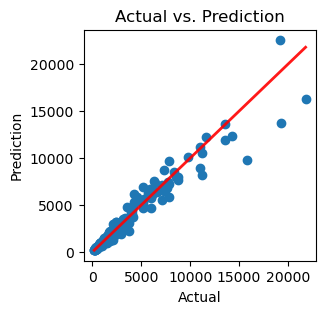

In [104]:
#Actual vs. Prediction
plt.figure(figsize = (3, 3))
plt.scatter(x = y_test, y = pred_boosting)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 9: XGBoost Regression


In [105]:
from xgboost import XGBRegressor
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
learning_rate = [0.01, 0.1,0.015]
subsample = [0.6, 0.8, 1]
max_depth = [1, 3, 5]
colsample_bytree=[0.3,0.6,0.7]
reg_alpha=[0.01,0.015,0.1]
reg_lambda =[0.01,0.015,0.1]
grid = list(itertools.product(learning_rate, subsample, max_depth,colsample_bytree,reg_alpha,reg_lambda))
grid = pd.DataFrame(data = grid, 
                    index = range(1, 730), 
                    columns = ['learning_rate', 'subsample', 'max_depth','colsample_bytree',
                              'reg_alpha','reg_lambda'])
grid

,learning_rate,subsample,max_depth,colsample_bytree,reg_alpha,reg_lambda
1,0.010,0.6,1,0.3,0.010,0.010
2,0.010,0.6,1,0.3,0.010,0.015
3,0.010,0.6,1,0.3,0.010,0.100
4,0.010,0.6,1,0.3,0.015,0.010
5,0.010,0.6,1,0.3,0.015,0.015
...,...,...,...,...,...,...
725,0.015,1.0,5,0.7,0.015,0.015
726,0.015,1.0,5,0.7,0.015,0.100
727,0.015,1.0,5,0.7,0.100,0.010
728,0.015,1.0,5,0.7,0.100,0.015


In [106]:
#K-fold Cross Validation to Choose the Best Model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = grid.shape[0]) #to save cv results

for i in range(grid.shape[0]):
    xgbreg = XGBRegressor(n_estimators = 1000,
                      max_depth = grid.iloc[i,2],              
                      learning_rate = grid.iloc[i,0],            
                      subsample = grid.iloc[i,1],             
                      colsample_bytree = grid.iloc[i,3],      
                      reg_alpha = grid.iloc[i,4],             
                      reg_lambda = grid.iloc[i,5],            
                      n_jobs = -1                
                      )
    scores = cross_val_score(estimator = xgbreg, 
                             X = X_train, y = logy_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean() 


In [107]:
grid.iloc[np.argmax(cv_errors), :]

learning_rate       0.10
subsample           0.60
max_depth           5.00
colsample_bytree    0.70
reg_alpha           0.10
reg_lambda          0.01
Name: 322, dtype: float64

In [108]:
xgbreg = XGBRegressor(n_estimators = 1000,
                      max_depth = 5,               
                      learning_rate = 0.1,         
                      subsample = 0.6,            
                      colsample_bytree = 0.7,      
                      reg_alpha = 0.1,            
                      reg_lambda = 0.01,            
                      n_jobs = -1,                
                      random_state=123)

xgb_reg = xgbreg.fit(X_train, logy_train)

In [109]:
pred_xgb = xgb_reg.predict(X_test)
pred_xgb = np.exp(pred_xgb)
pred_xgb

array([  479.59213, 11569.038  , 19959.121  ,   253.90063,  4254.2334 ,
        1739.3604 ,  2730.857  ,   245.9192 ,  3518.146  ,  2230.0105 ,
        1414.0765 ,  2415.5237 ,   935.73596,   256.94254,  1435.6683 ,
         884.62585,   213.38615,  1081.9052 ,  8416.605  ,   911.47784,
         393.4684 ,  1075.9753 ,  2370.0813 ,   547.31274,   474.62753,
        6853.055  ,   569.6378 ,   629.5564 ,  6682.7397 ,  5981.4585 ,
         478.13303,   494.2286 ,  4813.2915 ,  2001.73   ,  3265.9153 ,
        1099.5481 ,   529.4848 ,  1040.4844 ,  5786.0776 ,  5356.0103 ,
        1781.0734 ,  1006.3713 ,  6486.5728 ,   690.5392 ,  3490.3816 ,
         307.11197,   689.89215,  5508.917  ,   955.2621 , 12083.442  ,
        2926.3914 ,  2998.233  ,   517.6513 ,  7610.3213 ,  1339.7716 ,
         537.1492 ,   360.573  ,  1646.0734 ,  1001.9628 ,  2607.8762 ,
         916.35474,   906.57416,  3221.4417 ,  1674.9053 ,  2669.2927 ,
         937.9459 ,   334.86353,   882.31354,  3505.0017 ,  1161

In [110]:
#Absolute error
abs_err_xgb = abs(y_test - pred_xgb)
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.concat([model_comp, 
                        pd.DataFrame({'Mean of AbsErrors':    abs_err_xgb.mean(),
                                      'Median of AbsErrors' : abs_err_xgb.median(),
                                      'SD of AbsErrors' :     abs_err_xgb.std(),
                                      'IQR of AbsErrors':     iqr(abs_err_xgb),
                                      'Min of AbsErrors':     abs_err_xgb.min(),
                                      'Max of AbsErrors':     abs_err_xgb.max()}, index = ['XGB Reg']), 
                       ])

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,463.086210,146.952214,863.096458,441.710629,0.961053,7288.074021
Forward Stepwise,459.513765,161.580734,816.703856,464.084715,0.969182,6587.488992
Backward Stepwise,466.219876,156.201853,830.915477,470.277224,0.045529,6503.217697
Ridge Reg,518.494657,198.902233,827.179071,503.015363,0.383152,5774.659280
Lasso Reg,502.364325,201.513220,820.834452,490.372159,0.249506,6092.136353
Decision Tree Reg,518.037689,171.076639,819.782323,568.872445,0.501738,5673.040540
Bagging Reg,430.163893,137.048747,808.293685,419.775668,0.220170,6762.980510
Random Forest Reg,426.099222,163.405243,789.160194,396.472075,0.508351,6416.049342
GB Reg,397.301714,136.052151,784.956960,367.819066,0.423519,6098.071820
XGB Reg,398.384703,150.302673,698.382328,447.080929,0.805176,5766.257812


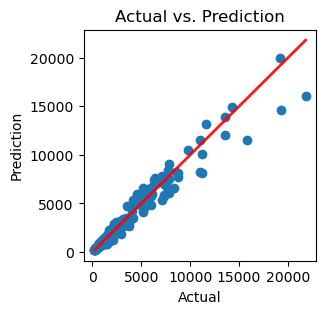

In [111]:
#Actual vs. Prediction
plt.figure(figsize = (3, 3))
plt.scatter(x = y_test, y = pred_xgb)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
plt.show()

## Result Project:

Mean of Absolute Errors: Lower values indicate better performance. In this case, "GB Reg" has the lowest mean absolute error (397.301714), followed closely by "XGB Reg" (398.384703). Also, Randomforest and Bagging had a good perfomance 

Based on these observations, it appears that "XGB Reg" and "GB Reg"  perform well across multiple metrics, indicating better overall performance compared to the other models. 

## Business Understanding

####  1. What is the main motivation of the project? 
    
The main motivation of this project, given the provided dataset, is to build a predictive model for the variable "Apps," which represents the number of applications received by US colleges. By analyzing the other variables in the dataset, the aim is to develop a model that can accurately predict the number of applications a college might receive based on various factors.
 

#### 2. What can the output of the project be used for? 


The output of this project would be a predictive model that can estimate the number of applications a college is likely to receive. This can be used for:

- College admissions planning: Colleges can utilize the predictive model to forecast the number of applications they are likely to receive in the future. This can aid in resource allocation, staffing, and infrastructure planning.
- Marketing and recruitment strategies: The model's predictions can inform colleges' marketing and recruitment efforts. By understanding the factors that influence the number of applications, colleges can tailor their strategies to attract potential applicants.
- Comparative analysis: The model can be used to compare colleges based on their predicted number of applications. This information can help colleges assess their competitiveness and make informed decisions regarding admissions criteria, scholarships, and financial aid packages

#### 3. Who might be interested in the results of this project? Why?

Various stakeholders might be interested in the results of this project:

- College administrators and admissions officers: They can utilize the predictive model to forecast the number of applications their institution might receive. This information can assist in planning admissions processes, evaluating recruitment strategies, and setting realistic enrollment goals.
- Higher education consultants: Professionals who provide guidance to students and families during the college selection process can benefit from the model's predictions. It can help them provide insights into colleges' competitiveness and assist students in making informed decisions.
- Education researchers: Researchers interested in studying college admissions, enrollment trends, and factors influencing application numbers can utilize the model's predictions as a valuable data source.
- Policy-makers and educational authorities: The predictions can assist in understanding the overall landscape of college applications and aid in formulating policies related to higher education, financial aid, and admissions.college admissions process.

## Data Understanding

#### 1. Where did the data come from and how was it collected?

The data in the provided dataset is from the 1995 issue of US News and World Report. The exact details about how the data was collected are not specified in the given information. However, it is common for publications like US News and World Report to collect data from various sources such as surveys, institutional reports, and public records to compile their rankings and statistics on colleges.

#### 2. What do each of the variables measure?

The variables in the dataset measure different characteristics of US colleges, such as whether they are private or public, the number of applications they receive, the number of students they enroll, their tuition and room/board costs, the percentage of their faculty with Ph.D.'s, and their graduation rates.

#### 3. Is there any ambiguity in data definitions?

Based on the given dataset, there is no apparent ambiguity in data definitions. The variables are relatively self-explanatory, representing various aspects of colleges and universities.

####  4. Is it possible that there is an error in measuring variables or recording data?

Yes, there was an error in the "Percentage of faculty with Ph.D.'s" variable, as it represents a percentage and should not exceed 100. Additionally, there was an error in the "Graduation rate" variable, as it represents a rate and should not exceed 100. Data collection processes can occasionally involve human errors, such as data entry mistakes or inconsistencies across different institutions, which could potentially introduce errors into the dataset.


####  5. What other variables, if any, could help solve the problem?

To solve the problem of predicting the number of applications (Apps), additional variables that could potentially help include:

- College location: The geographical location of the college could play a role in the number of applications received.
- College reputation: A measure of the college's reputation or ranking could influence application numbers.
- Majors offered: The range of academic programs and majors offered by the college may attract different levels of interest and affect application numbers.
- Financial aid: Information on the availability and generosity of financial aid packages could impact the number of applications received.
    
####  6. What kind of variables are available (categorical-numerical)?

The available variables are a mix of categorical and numerical variables. The "Private" variable is categorical, while the other variables are numerical.

####  7. What is the statistical summary of the available variables? 

I answerd this question at the beginning of this project

## Data Prepration

####  1. Is there a need to merge the data? Actions and results should be reported. 

No, 

####  2. Is there a need to clean the data? Actions and results should be reported.

No, there was no Missing value.

####  3. Is it necessary to convert data? Actions and results should be reported.  
No

####  4. Is there a need to reduce data? Actions and results should be reported.
While there were some outliers in the data, particularly in the number of applications, I decided to retain the entire dataset as the outliers did not significantly impact the overall results. The presence of outliers in the number of applications is not uncommon in this context, and removing them would not alter the conclusions drawn from the analysis.

## Assessment
#### what suggestions do you have to test the results in the real environment?
Scalability: The dataset contains a large number of observations, which can pose challenges in terms of processing and storage. It is important to consider the scalability of the algorithm to handle big datasets efficiently.

Data Integration: In real-world scenarios, data may come from multiple sources or systems. It is crucial to ensure seamless integration and compatibility of the algorithm with different data formats, structures, and systems to facilitate data ingestion and preprocessing.

Resource Requirements: Running models on big datasets can be computationally intensive and may require substantial computing resources. It is essential to assess and allocate sufficient server capacity or cloud resources to handle the computational demands.

Efficient Model Execution: Processing large datasets can be time-consuming, and running models may take a considerable amount of time. Optimizing the algorithm's efficiency and reducing its computational complexity can help minimize the time required for model execution.

Real-Time or Batch Processing: Consider whether the algorithm needs to operate in real-time, providing immediate predictions as new data arrives, or if batch processing is sufficient. Real-time processing often requires low-latency and real-time streaming capabilities.

## Deployment
##### Now, if you want to develop such an algorithm on an industrial scale, think about what challenges you will face and for that What solutions do you have? Report the following:
#### 1. Examine the challenges of algorithm development.
#### 2. What solutions do you have to solve them?
#### 3. What requirements do you need to provide those solutions


1. **Data Scalability:** As the dataset grows larger, processing and analyzing the data can become computationally intensive and time-consuming. Additionally, handling large volumes of data may require distributed computing or specialized infrastructure.

   **Solution:** Utilize technologies such as parallel computing, distributed systems, or cloud-based solutions to handle big data efficiently. 

2. **Data Quality and Preprocessing:** Real-world datasets often have missing values, outliers, inconsistencies, or noise that can impact the accuracy and reliability of the algorithm. It is crucial to handle these issues before training the model.

   **Solution:** Apply appropriate data preprocessing techniques such as handling missing values (imputation), outlier detection, data normalization, and feature engineering to ensure data quality. Employing robust statistical methods or machine learning algorithms specifically designed for handling noisy or incomplete data can be beneficial.

3. **Feature Selection and Dimensionality:** The dataset may contain a large number of features, some of which may be irrelevant, redundant, or highly correlated. Using all the features can lead to overfitting, increased model complexity, and reduced interpretability.

   **Solution:** Perform feature selection techniques, such as statistical tests, feature importance ranking, or dimensionality reduction algorithms (e.g., Principal Component Analysis ), to identify the most informative and relevant features. This process helps reduce noise, improve model performance, and enhance interpretability.

4. **Model Selection and Tuning:** Choosing the right algorithm or model architecture and optimizing its hyperparameters can significantly impact the algorithm's performance. It can be challenging to identify the best-performing model among a wide range of options.

   **Solution:** Conduct thorough model evaluation and selection by using techniques like cross-validation, performance metrics, and comparing different algorithms. 


To provide these solutions, the following requirements may be necessary:

- Adequate computational resources, including hardware (e.g., servers, clusters) and software (e.g., data processing frameworks, modeling libraries).
- Skilled data scientists, machine learning engineers, and software developers proficient in algorithm development, data preprocessing, model selection, and deployment.
- Robust and reliable data infrastructure, including data storage, data management systems, and scalable computing resources.



## Conlusion


1. **What did you learn from this project?**
During this project, I gained valuable insights and knowledge. Specifically, I learned the following:

- Data Validation: I discovered that some data in the dataset were not correct based on their intended meaning. For instance, the "PhD" variable was originally represented as a percentage, but I found instances where the maximum value exceeded 100. Similarly, the maximum "Grad.Rate" value also exceeded 100. This experience taught me the importance of validating data and ensuring its integrity before analysis.

- Data Preprocessing: To address the aforementioned issue, I decided to cap any values exceeding 100 in both the "PhD" and "Grad.Rate" variables. This preprocessing step helped to maintain data consistency and eliminate outliers.

- One-Hot Encoding: I also learned various techniques for one-hot encoding categorical variables. This approach allowed me to represent categorical data in a numerical format suitable for analysis and modeling.

2. **What challenges did you face? How did you solve them?**

During the project, I encountered several challenges, and I implemented the following solutions:

- Heteroscedasticity: I observed the presence of heteroscedasticity in the relationship between the response variable and the features. To address this issue, I initially transformed only the response variable. However, I discovered that this transformation did not fully mitigate the problem. As a solution, I decided to apply transformations to both the response variable and the feature variables. This approach helped to achieve more balanced and homoscedastic relationships.

- Data Integrity: As mentioned earlier, I encountered data inconsistencies where certain variables had values exceeding their logical range. To ensure data integrity and maintain meaningful interpretations, I capped the values of the "PhD" and "Grad.Rate" variables at 100. This approach prevented misleading or incorrect interpretations resulting from unrealistic values.

- Model Selection: Choosing the most suitable model for the dataset posed another challenge. To overcome this, I implemented techniques such as cross-validation, model evaluation metrics, and comparing the performance of different algorithms. This approach helped me select the best-performing model based on the specific project requirements.

- Finding better hyperparameters for decision trees, bagging, XGBoost, and other models was quite challenging. I experimented with various hyperparameters and tested their performance to determine the most effective ones.